In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

import numpy as np

pd.options.display.max_colwidth = 200

In [2]:
!ls *.csv

Astro-2015.csv Astro-2017.csv Geo-2017.csv   Neuro-2017.csv
Astro-2016.csv Geo-2016.csv   Neuro-2016.csv


In [3]:
def reduce_data(filename):
    try:
        data = pd.read_csv(filename)
    except UnicodeDecodeError:
        data = pd.read_csv(filename, encoding="ISO-8859-1")
    cols = [c for c in data.columns if c.startswith('Q')]
    data = data[cols]
    data.columns = [c.replace('ID', '') for c in data.columns]
    questions = data.iloc[0]
    data = data.iloc[1:]
    if "ImportId" in data.iloc[0, 0]:
        data = data.iloc[1:]
    return data, questions

In [4]:
AHWdata2016, AHWquestions2016 = reduce_data('Astro-2016.csv')
for k, q in AHWquestions2016.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at AHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek helped make me a better scientist


In [5]:
AHWdata2017, AHWquestions2017 = reduce_data('Astro-2017.csv')
for k, q in AHWquestions2017.items():
    if "I believe" in q:
        print(k, q)

Q63_4 Please indicate how strongly you agree or disagree with the following statements: - I believe the selection procedure for Astro Hack Week was fair.
Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at AHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek helped make me a better scientist


In [6]:
NHWdata2016, NHWquestions2016 = reduce_data('Neuro-2016.csv')
for k, q in NHWquestions2016.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Q24_1 - I believe that Neurohackweek was useful for my future career
Q24_2 Q24_2 - I believe that I learned skills at NHW that are applicable outside academia
Q24_3 Q24_3 - I believe that Neurohackweek helped make me a better scientist


In [7]:
NHWdata2017, NHWquestions2017 = reduce_data('Neuro-2017.csv')
for k, q in NHWquestions2017.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that Neurohackweek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at NHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that Neurohackweek helped make me a better scientist


In [8]:
GHWdata2016, GHWquestions2016 = reduce_data('Geo-2016.csv')
for k, q in GHWquestions2016.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at GHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek helped make me a better scientist


In [9]:
GHWdata2017, GHWquestions2017 = reduce_data('Geo-2017.csv')
for k, q in GHWquestions2017.items():
    if "I believe" in q:
        print(k, q)

Q24_1 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek (GHW) was useful for my future career
Q24_2 Please say how strongly you agree or disagree with the following statements: - I believe that I learned skills at GHW that are applicable outside academia
Q24_3 Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek helped make me a better scientist


Let's see how many responses we got:

In [10]:
print(AHWdata2016.shape)
print(AHWdata2017.shape)

(35, 87)
(37, 76)


In [11]:
print(GHWdata2016.shape)
print(GHWdata2017.shape)

(42, 125)
(41, 118)


In [12]:
print(NHWdata2016.shape)
print(NHWdata2017.shape)

(41, 110)
(45, 107)


Let's join the 2016 and 2017 data sets together:

In [13]:
AHWdata = pd.concat((AHWdata2016, AHWdata2017))
GHWdata = pd.concat((GHWdata2016, GHWdata2017))
NHWdata = pd.concat((NHWdata2016, NHWdata2017))

In [14]:
answers = ['Strongly Disagree', 'Disagree', 'Somewhat Disagree', 'Agree',
           'Somewhat Agree', 'Strongly Agree', "I don't know"]

for i in range(1, 6):
    print(70 * '=')
    key = 'Q24_%i'%i
    print(AHWquestions2016[key])
    print(NHWquestions2016[key])
    print(GHWquestions2016[key])
    for label, data in zip(['astro', 'geo', 'neuro'], [AHWdata, GHWdata, NHWdata]):
        print(label)
        grouped = data.groupby(key)[key].count()
        grouped.index.name = None
        for col in answers:
            if col not in grouped:
                grouped[col] = 0
        grouped = grouped[answers]
        print(grouped)
        print()
        

Please say how strongly you agree or disagree with the following statements: - I believe that AstroHackWeek was useful for my future career
Q24_1 - I believe that Neurohackweek was useful for my future career
Please say how strongly you agree or disagree with the following statements: - I believe that Geohackweek was useful for my future career
astro
Strongly Disagree     0
Disagree              0
Somewhat Disagree     1
Agree                23
Somewhat Agree       14
Strongly Agree       23
I don't know          1
Name: Q24_1, dtype: int64

geo
Strongly Disagree     0
Disagree              0
Somewhat Disagree     1
Agree                27
Somewhat Agree       11
Strongly Agree       33
I don't know          1
Name: Q24_1, dtype: int64

neuro
Strongly Disagree     0
Disagree              0
Somewhat Disagree     0
Agree                17
Somewhat Agree        5
Strongly Agree       62
I don't know          1
Name: Q24_1, dtype: int64

Please say how strongly you agree or disagree with t

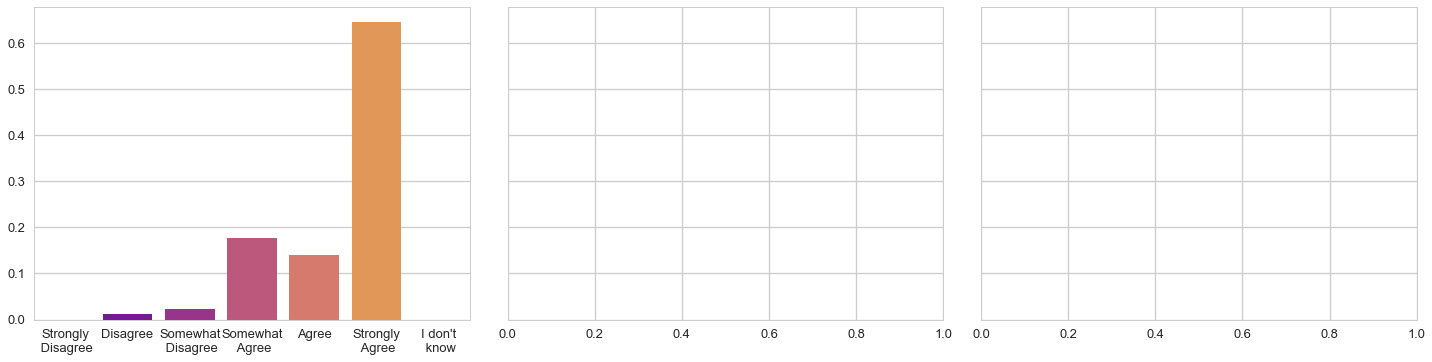

In [15]:
fig, ax = plt.subplots(1,3, figsize=(20,5), sharey=True)
plt.tight_layout(w_pad=2)
idx_labels = ["Strongly\n Disagree", "Disagree", "Somewhat\n Disagree", 
              "Somewhat\n Agree", "Agree", "Strongly\n Agree", "I don't\n know"]

sns.barplot(idx_labels, grouped.values/grouped.values.sum(), 
            ax=ax[0], palette="plasma")

## Questions To Answer

- Do participants feel that they improved during Hack Week (in data science methods, in collaboration, etc)
- Do participants feel able to do more reproducible research or believe more in reproducible research?
- Have Hack Weeks an effect on changing attitudes about reproducibility and open science?


### Which Questions are there in the Questionnaire that we can use to tackle these?

* AHW: "Rate how much you learned about statistics/machine learning/programming/sampling/visualization/big data/hacking/"
* AHW: "On average, how educational did you think the tutorials/break-outs/hacking where for you?"
* AHW: "I ended up teaching things to other people"
* AHW: "I hacked on topics, tools or methods that were new to me"
* AHW: "I believe AHW was useful for my future career"
* AHW: "I believe the skills I learned at AHW are applicable outside Academia"
* AHW: "I believe that AHW helped make me a better scientist"
* AHW: "I felt like I learned things which improve my day-to-day research"
* AHW: "I felt like I built valuable connections at AHW"
* AHW: "How helpful was AHW for these elements of your career: Meeting new collaborators"
* AHW: "How helpful was AHW for these elements of your career: Learning new technical skills"
* AHW: "I put code and/or data I created at AHW up on GitHub or another public repo"
* AHW: "I feel like AHW has made me more comfortable with doing open science"

* NHW: "Rate how much you learneda bout neuroscience/statistics/machine learning/programming/image processing/visualization/big data/cloud computing/hacking"
* NHW: "On average, how educational did you think the tutorials/break-out/etc were?"
* NHW: "I ended up teahcing things to other people"
* NHW: "I hacked on topics, tools, or methods that were new to me"
* NHW: "I believe that NeuroHackWeek was useful for my future career?"
* NHW: "I believe that I learned skills at NHW that are applicable outside Academia"
* NHW: "I believe that NeuroHackWeek has helped make me a better scientist"
* NHW: "I feel like I learned things which improve my day-to-day research"
* NHW: "I felt like I built valuable connections at NHW
* NHW: "I put code and/or data I created at NHW up on GitHub or another public repo"
* NHW: "Before NHW, most of my code & data was already on GitHUb or another public repo"
* NHW: "I feel scientists have an obligation to make their code and data public"
* NHW: "I feel like NHW has made me more comfortable with doing open science"

* GHW: "Rate how uch you think you learneda bout the following topics at GeoHackWeek: Git/Github, Docker, Python, Jupyter, Visualization, Cloud Computing, Reproducibility,"
* GHW: "On average, how educational did you feel the followingn activities and sessions were for you? Introduction, * Git/Github tutorial, Conda Tutorial, Visualization Tutorial, Reproducibility Discussion, Hack Sessions"
* GHW: "I ended up teaching things to other people"
* GHW: "I hacked on topics, tools, or methods that were very new to me"
* GHW: "I didn't personally know anyone at GeoHackWeek before I came"
* GHW: "I beleive that GHW was useful for my future career"
* GHW: "I believe that I learned skills at GHW that are applicable outside Academia"
* GHW: "I believe that GHW helped make me a better scientist"
* GHW: "I feel like I learned things which improve my day-to-day research"
* GHW: "I felt like I built valuable connections at GHW
* GHW: "I put code and/or data I created on GH or another public repo"
* GHW: "Before GHW, most of my code and data was already on GH or another public repo"
* GHW: "I feel scientists have an obligation to make their code and data public
* GHW: "I am embarrassed to put my code and data online"
* GHW: "I am afraid that if I put my code and data public, I will be scooped"
* GHW: "I feel like GHW has made me more comfortable with doing open science"



### Narratives

I think there are three narratives I can pull out of the survey: 
* learning technical skills: how much have people learned about specific technical skills at the three hack weeks, and how have these technical skills impacted their careers and day-to-day research?
* Connections + collaborations: Did participants know each other before the workshop, and have they built valuable connections at the workshop? How did they collaborate at the workshop?
* Reproducibility + open science: how many participants did open science before, and among those that didn't, what are their attitudes toward open science, and did the hack weeks change these attitudes?

### Learning Technical Skills
* "I hacked on topics, tools, or methods that were very new to me"
* "I believe that GHW helped make me a better scientist"
* "I feel like I learned things which improve my day-to-day research"
* "How helpful was attending AHW for these elements of your career? - Learning new technical skills"

In [16]:
techskills_ahw_ids = ["Q23_3", "Q24_3", "Q24_4"]

In [17]:
techskills_nhw_ids = ["Q23_3", "Q24_3", "Q24_4"]

In [18]:
techskills_ghw_ids = ["Q23_3", "Q24_3", "Q24_4"]

In [19]:
idx = ['Strongly Agree', 'Agree', 'Somewhat Agree', 
        'Somewhat Disagree', 'Disagree', "Strongly Disagree", "I don't know"]

In [20]:
techskills_233_dict = dict(zip(["Astro Hack Week", 
                               "Geo Hack Week",
                               "Neuro Hack Week"],
                              [AHWdata["Q23_3"].value_counts(),
                              GHWdata["Q23_3"].value_counts(),
                              NHWdata["Q23_3"].value_counts()]))

In [21]:
ahw_techskills_233 = AHWdata["Q23_3"].value_counts()
techskills_233_type = ["Astro Hack Week" for i in range(len(ahw_techskills_233))]
ahw_techskills_233 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_233_type, ahw_techskills_233])))
ahw_techskills_233 = ahw_techskills_233.reindex(idx)

In [22]:
ghw_techskills_233 = GHWdata["Q23_3"].value_counts()
techskills_233_type = ["Geo Hack Week" for i in range(len(ghw_techskills_233))]
ghw_techskills_233 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_233_type, ghw_techskills_233])))
ghw_techskills_233 = ghw_techskills_233.reindex(idx)

In [23]:
nhw_techskills_233 = NHWdata["Q23_3"].value_counts()
techskills_233_type = ["Neuro Hack Week" for i in range(len(nhw_techskills_233))]
nhw_techskills_233 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_233_type, nhw_techskills_233])))
nhw_techskills_233 = nhw_techskills_233.reindex(idx)

In [24]:
ahw_techskills_233.index.name = "Responses"
ghw_techskills_233.index.name = "Responses"
nhw_techskills_233.index.name = "Responses"

In [25]:
techskills_233_all = pd.concat([ahw_techskills_233, ghw_techskills_233, nhw_techskills_233])

In [26]:
techskills_233_all["Counts"] = techskills_233_all["Counts"].replace(to_replace=np.nan, value=0.0)

Text(0.5,1,'I hacked on topics, tools, \n or methods that were very new to me.')

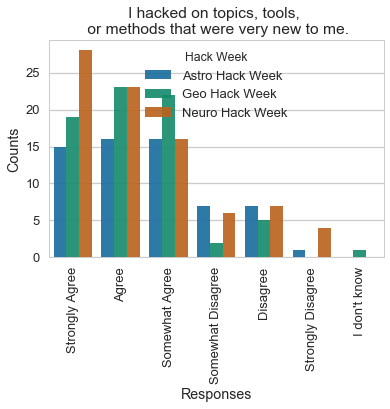

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=techskills_233_all.index, y="Counts", data=techskills_233_all, ax=ax, hue="Hack Week", alpha=0.9)
xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
ax.set_xticklabels(xaxislabels, rotation=90)
ax.set_title("I hacked on topics, tools, \n or methods that were very new to me.")


Let's tackle the next question:

Text(0.5,1,'I believe that GHW helped make me a better scientist')

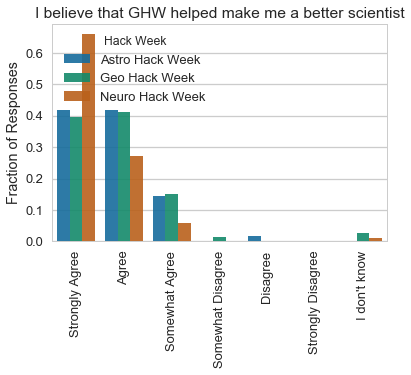

In [28]:
ahw_techskills_243 = AHWdata["Q24_3"].value_counts()
ahw_techskills_243 /= ahw_techskills_243.sum()
techskills_243_type = ["Astro Hack Week" for i in range(len(ahw_techskills_243))]
ahw_techskills_243 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_243_type, ahw_techskills_243])))
ahw_techskills_243 = ahw_techskills_243.reindex(idx)

ghw_techskills_243 = GHWdata["Q24_3"].value_counts()
ghw_techskills_243 /= ghw_techskills_243.sum()
techskills_243_type = ["Geo Hack Week" for i in range(len(ghw_techskills_243))]
ghw_techskills_243 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_243_type, ghw_techskills_243])))
ghw_techskills_243 = ghw_techskills_243.reindex(idx)

nhw_techskills_243 = NHWdata["Q24_3"].value_counts()
nhw_techskills_243 /= nhw_techskills_243.sum()
techskills_243_type = ["Neuro Hack Week" for i in range(len(nhw_techskills_243))]
nhw_techskills_243 = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [techskills_243_type, nhw_techskills_243])))
nhw_techskills_243 = nhw_techskills_243.reindex(idx)

techskills_243_all = pd.concat([ahw_techskills_243, ghw_techskills_243, nhw_techskills_243])
techskills_243_all["Counts"] = techskills_243_all["Counts"].replace(to_replace=np.nan, value=0.0)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=techskills_243_all.index, y="Counts", data=techskills_243_all, ax=ax, hue="Hack Week", alpha=0.9)
xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
ax.set_xticklabels(xaxislabels, rotation=90)
ax.set_ylabel("Fraction of Responses")
ax.set_title("I believe that GHW helped make me a better scientist")


Let's make a function to make the plotting easier

In [29]:
def question_barplot(q_id, title, idx, ahw_data, ghw_data, nhw_data, ax=None, palette="colorblind"):
    """
    Make a bar plot of a question.
    
    Parameters
    ----------
    q_id : iterable
        A list of question IDs for Astro, Geo and Neuro Hack Week, respectively. 
        Must be of `len(q_id) = 3`, but the IDs can be the same.
        
    title : str
        A string for the title of the plot
    
    idx : iterable
        A list with all possible question responses. Needed because sometimes not 
        all responses were used by participants of the survey
    
    ahw_data, ghw_data, nhw_data: pd.DataFrame objects
        The data frames with the survey data from AHW, GHW and NHW, respectively
    
    ax : matplotlib.Axes object, optional
        Can be used to pass an existing matplotlib.Axes object. If None, a new 
        figure object will be instantiated for the plot
    
    """
    ahw_responses = ahw_data[q_id[0]].value_counts()
    ahw_responses /= ahw_responses.sum()
    ahw_type = ["Astro Hack Week" for i in range(len(ahw_responses))]
    ahw_responses = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [ahw_type, ahw_responses])))
    ahw_responses = ahw_responses.reindex(idx)

    ghw_responses = ghw_data[q_id[0]].value_counts()
    ghw_responses /= ghw_responses.sum()
    ghw_type = ["Geo Hack Week" for i in range(len(ghw_responses))]
    ghw_responses = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [ghw_type, ghw_responses])))
    ghw_responses = ghw_responses.reindex(idx)

    nhw_responses = nhw_data[q_id[0]].value_counts()
    nhw_responses /= nhw_responses.sum()
    nhw_type = ["Neuro Hack Week" for i in range(len(nhw_responses))]
    nhw_responses = pd.DataFrame(dict(zip(["Hack Week", "Counts"], [nhw_type, nhw_responses])))
    nhw_responses = nhw_responses.reindex(idx)


    responses_all = pd.concat([ahw_responses, ghw_responses, nhw_responses])
    responses_all["Counts"] = responses_all["Counts"].replace(to_replace=np.nan, value=0.0)

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6,4))

    sns.barplot(x=responses_all.index, y="Counts", data=responses_all, ax=ax, 
                hue="Hack Week", palette=palette)
    xaxislabels = [x.get_text() for x in ax.get_xticklabels()]
    xaxislabels = ["\n".join([" ".join(x.split(" ")[:-1]), x.split(" ")[-1]]) if (len(x.split(" "))>1) else x for x in xaxislabels ]
    ax.set_xticklabels(xaxislabels, rotation=90)
    ax.set_ylabel("Fraction of Responses")
    ax.set_title(title)

    return ax    

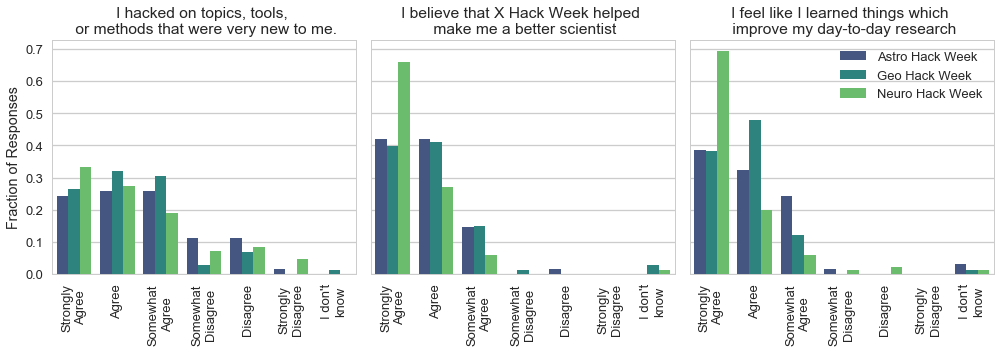

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)

ax1 = question_barplot(["Q23_3", "Q23_3", "Q23_3"], 
                       "I hacked on topics, tools, \n or methods that were very new to me.",
                       idx, AHWdata, GHWdata, NHWdata, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(["Q24_3", "Q24_3", "Q24_3"], 
                       "I believe that X Hack Week helped \n make me a better scientist",
                       idx, AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(["Q24_4", "Q24_4", "Q24_4"], 
                       "I feel like I learned things which \n improve my day-to-day research",
                       idx, AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")
ax3.set_ylabel("")
ax3.legend(loc=1)

plt.tight_layout(w_pad=-1.0)
plt.savefig("../fig/eval_techskills.eps",  format='eps', dpi=1000)

#### "I hacked on topics, tools, \n or methods that were very new to me."

In [31]:
ahw_small = AHWdata[(AHWdata["Q23_3"] == "Agree") | 
        (AHWdata["Q23_3"] == "Strongly Agree") | 
        (AHWdata["Q23_3"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q23_3"] == "Agree") | 
        (GHWdata["Q23_3"] == "Strongly Agree") | 
        (GHWdata["Q23_3"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q23_3"] == "Agree") | 
        (NHWdata["Q23_3"] == "Strongly Agree") | 
        (NHWdata["Q23_3"] == "Somewhat Agree")]

In [32]:
print(len(ahw_small)/len(AHWdata["Q23_3"].dropna()))
print(len(ghw_small)/len(GHWdata["Q23_3"].dropna()))
print(len(nhw_small)/len(NHWdata["Q23_3"].dropna()))

0.7580645161290323
0.8888888888888888
0.7976190476190477


#### "I believe that X Hack Week helped \n make me a better scientist"

In [33]:
ahw_small = AHWdata[(AHWdata["Q24_3"] == "Agree") | 
        (AHWdata["Q24_3"] == "Strongly Agree") | 
        (AHWdata["Q24_3"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q24_3"] == "Agree") | 
        (GHWdata["Q24_3"] == "Strongly Agree") | 
        (GHWdata["Q24_3"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q24_3"] == "Agree") | 
        (NHWdata["Q24_3"] == "Strongly Agree") | 
        (NHWdata["Q24_3"] == "Somewhat Agree")]

In [34]:
print(len(ahw_small)/len(AHWdata["Q24_3"].dropna()))
print(len(ghw_small)/len(GHWdata["Q24_3"].dropna()))
print(len(nhw_small)/len(NHWdata["Q24_3"].dropna()))

0.9838709677419355
0.958904109589041
0.9882352941176471


#### "I feel like I learned things which \n improve my day-to-day research"

In [35]:
ahw_small = AHWdata[(AHWdata["Q24_4"] == "Agree") | 
        (AHWdata["Q24_4"] == "Strongly Agree") | 
        (AHWdata["Q24_4"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q24_4"] == "Agree") | 
        (GHWdata["Q24_4"] == "Strongly Agree") | 
        (GHWdata["Q24_4"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q24_4"] == "Agree") | 
        (NHWdata["Q24_4"] == "Strongly Agree") | 
        (NHWdata["Q24_4"] == "Somewhat Agree")]

In [36]:
print(len(ahw_small)/len(AHWdata["Q24_4"].dropna()))
print(len(ghw_small)/len(GHWdata["Q24_4"].dropna()))
print(len(nhw_small)/len(NHWdata["Q24_4"].dropna()))

0.9516129032258065
0.9863013698630136
0.9529411764705882


### Collaboration

Let's look at some questions that encode collaborations:

* "I ended up teaching things to other people"
* "I felt like my contributions to my hack team(s) were valued"
* "I felt like I built valuable connections at GHW"


In [37]:
q_ind1 = ["Q23_2", "Q23_2", "Q23_2"]
title1 = "I ended up teaching \n things to other people"
q_ind2 = ["Q19_5", "Q19_5", "Q19_5"]
title2 = "I felt like my contributions to \n my hack team(s) were valued"
q_ind3 = ["Q24_5", "Q24_5", "Q24_5"]
title3 = "I felt like I built valuable \n connections at X Hack Week"

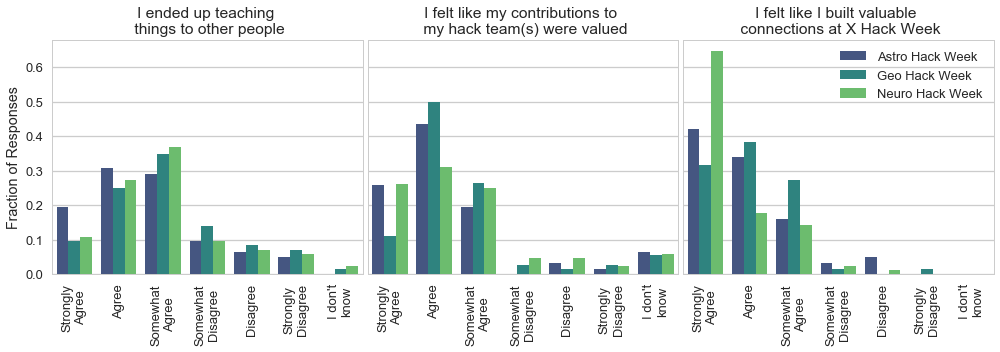

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx, AHWdata, GHWdata, NHWdata, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx, AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx, AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=0.5)
plt.savefig("../fig/eval_collab.eps", format='eps', dpi=1000)

Let's look at different levels of engagement:

In [39]:
def _plot_categorical(df, xlabel, ylabel, x_keys, y_keys, prefac, ax, cmap, s):
    """
    Plot two categorical variables against each other in a bubble plot.

    Parameters
    ----------
    df : pd.DataFrame
        A pandas DataFrame with the data

    xlabel : str
        The column name for the variable on the x-axis

    ylabel : str
        The column name for the variable on the y-axis

    x_keys : iterable
        A list containing the different categories in df[xlabel]

    y_keys: iterable
        A list containing the different categories in df[ylabel]

    prefac : float
        A pre-factor steering the shading of the bubbles

    ax : matplotlib.Axes object
        The matplotlib.Axes object to plot the bubble plot into

    cmap : matplotlib.cm.colormap
        A matplotlib colormap to use for shading the bubbles

    s : float
        A pre-factor changing the overall size of the bubbles

    Returns
    -------
    ax : matplotlib.Axes object
        The same matplotlib.Axes object for further manipulation

    """
    tuples, counts = [], []
    for i in range(len(x_keys)):
        for j in range(len(y_keys)):
            tuples.append((i,j))

            counts.append(len(df[(df[xlabel] == x_keys[i]) &
                                 (df[ylabel] == y_keys[j])]))

    x, y = zip(*tuples)

    cmap = plt.cm.get_cmap(cmap)
    sizes = (np.array(counts)/np.sum(counts))

    ax.scatter(x, y, s=s*1000*sizes, marker='o', linewidths=1, edgecolor='black',
                c=cmap(prefac*sizes/(np.max(sizes)-np.min(sizes))), alpha=0.7)

    ax.set_xticks(np.arange(len(x_keys)))
    ax.set_xticklabels(x_keys)
    ax.set_xlim(np.min(x)-1, np.max(x)+1)
    ax.set_xlabel(xlabel)

    ax.set_yticks(np.arange(len(y_keys)))
    ax.set_yticklabels(y_keys)
    ax.set_ylim(np.min(y)-1, np.max(y)+1)
    ax.set_ylabel(ylabel)

    return ax


I also want to figure out correlations between different categorical variables. Let's write a function for that. We're going to need a function that calculates the effect size via the corrected Cramer's V:

In [122]:
import scipy.stats
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2, pval, df, pop = scipy.stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = np.max([0, phi2 - ((k-1)*(r-1))/(n-1)])
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    df = np.min( [(kcorr-1), (rcorr-1)])
    cramers_v = np.sqrt(phi2corr / df)
        
    return cramers_v, df



Here's a function that does a Chi-square test, computes Cramer's V and just plots category versus category in a bubble plot for all three hack weeks:

In [170]:
def test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k= ["Strongly Agree", "Agree", "Somewhat Agree", "Somewhat Disagree", "Disagree", "Strongly Disagree"]):
    """
    This code tests for associations between two categorical variables 
    and makes some diagnostic plots
    
    Parameters
    ----------
    AHWdata: pandas.DataFrame
        The AstroHackWeek data
        
    GHWdata: pandas.DataFrame
        The GeoHackWeek data
        
    NHWdata: pandas.DataFrame
        The NeuroHackWeek data
        
    q1, q2: str
        The identifiers of which questions to use for the comparison
        
    title: str
        A title for the plots: should be the question asked
    
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    _plot_categorical(AHWdata, q1, q2, 
                      k, AHWdata[q2].value_counts().keys(), 
                      prefac=10, ax=ax, cmap="YlGnBu", s=4)
    ax.set_title("AHW: " + title)

    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    _plot_categorical(GHWdata, q1, q2, 
                      k, GHWdata[q2].value_counts().keys(), 
                      prefac=10, ax=ax, cmap="YlGnBu", s=4)
    ax.set_title("GHW: " + title)

    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    _plot_categorical(NHWdata, q1, q2, 
                      k, NHWdata[q2].value_counts().keys(), 
                      prefac=10, ax=ax, cmap="YlGnBu", s=4)
    ax.set_title("NHW: " + title)
    
    nhw_tmp = NHWdata[[q1, q2]].dropna()
    ghw_tmp = GHWdata[[q1, q2]].dropna()
    ahw_tmp = AHWdata[[q1, q2]].dropna()

    k_nhw = [ktmp for ktmp in k if ktmp in np.array(nhw_tmp[q1].value_counts().index)]
    nhw_tmp[q1] = pd.Categorical(nhw_tmp[q1], categories=k_nhw)
    nhw_tmp[q2] = pd.Categorical(nhw_tmp[q2])

    k_ghw = [ktmp for ktmp in k if ktmp in np.array(ghw_tmp[q1].value_counts().index)]
    ghw_tmp[q1] = pd.Categorical(ghw_tmp[q1], categories=k_ghw)
    ghw_tmp[q2] = pd.Categorical(ghw_tmp[q2])

    k_ahw = [ktmp for ktmp in k if ktmp in np.array(ahw_tmp[q1].value_counts().index)]
    ahw_tmp[q1] = pd.Categorical(ahw_tmp[q1], categories=k_ahw)
    ahw_tmp[q2] = pd.Categorical(ahw_tmp[q2])
    
    combined = pd.concat([ahw_tmp, ghw_tmp, nhw_tmp])

    
    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    _plot_categorical(combined, q1, q2, 
                      k, combined[q2].value_counts().keys(), 
                      prefac=10, ax=ax, cmap="YlGnBu", s=4)
    ax.set_title("All hack weeks: " + title)
    
    ahw_cm = pd.crosstab(ahw_tmp[q1], ahw_tmp[q2])
    ghw_cm = pd.crosstab(ghw_tmp[q1], ghw_tmp[q2])
    nhw_cm = pd.crosstab(nhw_tmp[q1], nhw_tmp[q2])
  
    combined_cm = pd.crosstab(combined[q1], combined[q2])
    
    for i, ktmp in enumerate(k[::-1]):
        ahw_tmp.loc[ahw_tmp[q1] == ktmp, q1 + "_num"] = i+1
        ghw_tmp.loc[ghw_tmp[q1] == ktmp, q1 + "_num"] = i+1
        nhw_tmp.loc[nhw_tmp[q1] == ktmp, q1 + "_num"] = i+1
        combined.loc[combined[q1] == ktmp, q1 + "_num"] = i+1

    nhw_tmp = nhw_tmp[[q1, q2, q1 + "_num"]].dropna()
    ghw_tmp = ghw_tmp[[q1, q2, q1 + "_num"]].dropna()
    ahw_tmp = ahw_tmp[[q1, q2, q1 + "_num"]].dropna()
    combined = combined[[q1, q2, q1 + "_num"]].dropna()


    combined_q2_unique = combined[q2].dropna().unique()
    print("There are %i unique categories in q2."%len(combined_q2_unique))
    
    ahw_list, ghw_list, nhw_list, combined_list = [], [], [], []
    for idx in combined_q2_unique:
        combined_list.append(combined.loc[combined[q2] == idx, q1 + "_num"])
        ahw_list.append(ahw_tmp.loc[ahw_tmp[q2] == idx, q1 + "_num"])
        ghw_list.append(ghw_tmp.loc[ghw_tmp[q2] == idx, q1 + "_num"])
        nhw_list.append(nhw_tmp.loc[nhw_tmp[q2] == idx, q1 + "_num"])
        
    
    ahw_cv, ahw_c_df = cramers_corrected_stat(ahw_cm)
    ahw_chi2, ahw_pv, ahw_df, ahw_exp = scipy.stats.chi2_contingency(ahw_cm)

    print("Correlation for AHW: " + str(ahw_chi2) + " for " + str(ahw_df) + " degrees of freedom.")
    print("p-value for the correlation for AHW: " + str(ahw_pv))
    print("The expected frequencies in each bin are: " + str(ahw_exp))
    print("Effect size for AHW: " + str(ahw_cv) + " for " + str(ahw_c_df) + " degrees of freedom.")
    if len(combined_q2_unique) == 2:
        ahw_mw, ahw_mw_pval = scipy.stats.mannwhitneyu(*ahw_list)
        print("Mann-Whitney U for AHW: " + str(ahw_mw) + ", p = " + str(ahw_mw_pval) + "\n")
    elif len(combined_q2_unique) > 2:
        ahw_kw, ahw_kw_pval = scipy.stats.kruskal(*ahw_list, nan_policy="omit")
        print("Kruskal-Wallis H for AHW: " + str(ahw_kw) + ", p = " + str(ahw_kw_pval) + "\n")


    ghw_cv, ghw_c_df = cramers_corrected_stat(ghw_cm)
    ghw_chi2, ghw_pv, ghw_df, ghw_exp = scipy.stats.chi2_contingency(ghw_cm)
    print("Correlation for GHW: " + str(ghw_chi2) + " for " + str(ghw_df) + " degrees of freedom.")
    print("p-value for the correlation for GHW: " + str(ghw_pv))
    print("The expected frequencies in each bin are: " + str(ghw_exp))
    print("Effect size for GHW: " + str(ghw_cv) + " for " + str(ghw_c_df) + " degrees of freedom.")
    if len(combined_q2_unique) == 2:
        ghw_mw, ghw_mw_pval = scipy.stats.mannwhitneyu(*ghw_list)
        print("Mann-Whitney U for GHW: " + str(ghw_mw) + ", p = " + str(ghw_mw_pval) + "\n")
    elif len(combined_q2_unique) > 2:
        ghw_kw, ghw_kw_pval = scipy.stats.kruskal(*ghw_list, nan_policy="omit")
        print("Kruskal-Wallis H for GHW: " + str(ghw_kw) + ", p = " + str(ghw_kw_pval) + "\n")


    nhw_cv,nhw_c_df = cramers_corrected_stat(nhw_cm)
    nhw_chi2, nhw_pv, nhw_df, nhw_exp = scipy.stats.chi2_contingency(nhw_cm)
    print("Correlation for NHW: " + str(nhw_chi2) + " for " + str(nhw_df) + " degrees of freedom.")
    print("p-value for the correlation for NHW: " + str(nhw_pv))
    print("The expected frequencies in each bin are: " + str(nhw_exp))
    print("Effect size for NHW: " + str(nhw_cv) + " for " + str(nhw_c_df) + " degrees of freedom.")
    if len(combined_q2_unique) == 2:
        nhw_mw, nhw_mw_pval = scipy.stats.mannwhitneyu(*nhw_list)
        print("Mann-Whitney U for NHW: " + str(nhw_mw) + ", p = " + str(nhw_mw_pval) + "\n")
    elif len(combined_q2_unique) > 2:
        nhw_kw, nhw_kw_pval = scipy.stats.kruskal(*nhw_list, nan_policy="omit")
        print("Kruskal-Wallis H for NHW: " + str(nhw_kw) + ", p = " + str(nhw_kw_pval) + "\n")


    comb_cv, comb_c_df = cramers_corrected_stat(combined_cm)
    comb_chi2, comb_pv, comb_df, comb_exp = scipy.stats.chi2_contingency(combined_cm)
    print("Correlation for all Hack Weeks: " + str(comb_chi2) + " for " + str(comb_df) + " degrees of freedom.")
    print("p-value for the correlation for all Hack Weeks: " + str(comb_pv))
    print("The expected frequencies in each bin are: " + str(comb_exp))
    print("Effect size for all Hack Weeks: " + str(comb_cv) + " for " + str(comb_c_df) + " degrees of freedom.")
    if len(combined_q2_unique) == 2:
        comb_mw, comb_mw_pval = scipy.stats.mannwhitneyu(*combined_list)
        print("Mann-Whitney U for all hack weeks: " + str(comb_mw) + ", p = " + str(comb_mw_pval) + "\n")
    elif len(combined_q2_unique) > 2:
        comb_kw, comb_kw_pval = scipy.stats.kruskal(*combined_list, nan_policy="omit")
        print("Kruskal-Wallis H for all hack weeks: " + str(comb_kw) + ", p = " + str(comb_kw_pval) + "\n")


    return 

### Rewriting Demographic Categories

I'm going to rewrite some of the demographic categories into something that's more useful to me.

##### Career Stage

I'm going to reclassify career stage into "student", "early-career academic", "late-career academic" and "other", to make these a little more manageable and comparable:

In [99]:
AHWdata["Q3"].unique()

array(['early-career researcher', 'faculty and research staff', 'other',
       nan], dtype=object)

In [100]:
AHWdata.loc[AHWdata["Q3"] == "Masters student", "Q3"] = "early-career researcher"
AHWdata.loc[AHWdata["Q3"] == "Ph.D student", "Q3"] = "early-career researcher"
AHWdata.loc[AHWdata["Q3"] == "Undergrad student", "Q3"] = "early-career researcher"

AHWdata.loc[AHWdata["Q3"] == "Post-doc", "Q3"] = "early-career researcher"

AHWdata.loc[AHWdata["Q3"] == "Tenured faculty", "Q3"] = "faculty and research staff"
AHWdata.loc[AHWdata["Q3"] == "Research staff", "Q3"] = "faculty and research staff"
AHWdata.loc[AHWdata["Q3"] == "Tenured faculty", "Q3"] = "faculty and research staff"
AHWdata.loc[AHWdata["Q3"] == "Junior faculty / tenure track", "Q3"] = "faculty and research staff"

AHWdata.loc[AHWdata["Q3"] == "Freelancer / contract worker", "Q3"] = "other"
AHWdata.loc[AHWdata["Q3"] == "Other (please state)", "Q3"] = "other"
AHWdata.loc[AHWdata["Q3"] == "Unemployed", "Q3"] = "other"

In [101]:
AHWdata["Q3"].unique()

array(['early-career researcher', 'faculty and research staff', 'other',
       nan], dtype=object)

In [102]:
GHWdata["Q3"].unique()

array([nan, 'early-career researcher', 'other',
       'faculty and research staff'], dtype=object)

In [103]:
GHWdata.loc[GHWdata["Q3"] == "Ph.D student", "Q3"] = "early-career researcher"
GHWdata.loc[GHWdata["Q3"] == "Masters student", "Q3"] = "early-career researcher"

GHWdata.loc[GHWdata["Q3"] == "Post-doc", "Q3"] = "early-career researcher"

GHWdata.loc[GHWdata["Q3"] == "Research staff", "Q3"] = "faculty and research staff"

GHWdata.loc[GHWdata["Q3"] == "Other (please state)", "Q3"] = "other"

In [104]:
GHWdata["Q3"].unique()

array([nan, 'early-career researcher', 'other',
       'faculty and research staff'], dtype=object)

In [105]:
NHWdata["Q3"].unique()

array(['early-career researcher', 'faculty and research staff', 'other',
       nan], dtype=object)

In [106]:
NHWdata.loc[NHWdata["Q3"] == "Ph.D student", "Q3"] = "early-career researcher"
NHWdata.loc[NHWdata["Q3"] == "Masters student", "Q3"] = "early-career researcher"

NHWdata.loc[NHWdata["Q3"] == "Post-doc", "Q3"] = "early-career researcher"

NHWdata.loc[NHWdata["Q3"] == "Research staff", "Q3"] = "faculty and research staff"
NHWdata.loc[NHWdata["Q3"] == "Junior faculty / tenure track", "Q3"] = "faculty and research staff"
NHWdata.loc[NHWdata["Q3"] == "Tenured faculty", "Q3"] = "faculty and research staff"

NHWdata.loc[NHWdata["Q3"] == "Other (please state)", "Q3"] = "other"

In [107]:
NHWdata["Q3"].unique()

array(['early-career researcher', 'faculty and research staff', 'other',
       nan], dtype=object)

##### Gender Identity

I'm going to reclassify gender into "male", "female", "other":

In [108]:
print(AHWdata["Q27"].unique())

['minority' 'non-minority' nan]


In [109]:
AHWdata.loc[AHWdata["Q27"] == "Other (please state)", "Q27"] = "minority"
AHWdata.loc[AHWdata["Q27"] == "Prefer not to respond", "Q27"] = "minority"
AHWdata.loc[AHWdata["Q27"] == "Gender queer", "Q27"] = "minority"

AHWdata.loc[AHWdata["Q27"] == "Woman", "Q27"] = "minority"
AHWdata.loc[AHWdata["Q27"] == "Man", "Q27"] = "non-minority"

print(AHWdata["Q27"].unique())


['minority' 'non-minority' nan]


In [110]:
print(GHWdata["Q27"].unique())

[nan 'non-minority' 'minority']


In [111]:
GHWdata.loc[GHWdata["Q27"] == "Prefer not to respond", "Q27"] = "minority"
GHWdata.loc[GHWdata["Q27"] == "Female", "Q27"] = "minority"
GHWdata.loc[GHWdata["Q27"] == "Male", "Q27"] = "non-minority"
GHWdata.loc[GHWdata["Q27"] == "Woman", "Q27"] = "minority"
GHWdata.loc[GHWdata["Q27"] == "Man", "Q27"] = "non-minority"


print(GHWdata["Q27"].unique())


[nan 'non-minority' 'minority']


In [112]:
print(NHWdata["Q27"].unique())

NHWdata.loc[NHWdata["Q27"] == "Prefer not to respond", "Q27"] = "minority"
NHWdata.loc[NHWdata["Q27"] == "Female", "Q27"] = "minority"
NHWdata.loc[NHWdata["Q27"] == "Male", "Q27"] = "non-minority"

print(NHWdata["Q27"].unique())



['minority' 'non-minority' nan]
['minority' 'non-minority' nan]


##### Race/Ethnicity

We're going to separate race/ethnicity into "white" and "non-white":

In [113]:
print(AHWdata["Q30"].unique())

['white' 'non-white' nan]


In [114]:
AHWdata.loc[AHWdata["Q30"] == "White", "Q30"] = "white"

AHWdata.loc[AHWdata["Q30"] == "Prefer not to respond", "Q30"] = "non-white"
AHWdata.loc[AHWdata["Q30"] == "Asian/Pacific Islander", "Q30"] = "non-white"
AHWdata.loc[AHWdata["Q30"] == "Not Listed (please specify)", "Q30"] = "non-white"
AHWdata.loc[AHWdata["Q30"] == "Hispanic/Latino", "Q30"] = "non-white"

print(AHWdata["Q30"].unique())

['white' 'non-white' nan]


In [115]:
print(GHWdata["Q30"].unique())

[nan 'white' 'non-white']


In [116]:
GHWdata.loc[GHWdata["Q30"] == "White", "Q30"] = "white"

GHWdata.loc[GHWdata["Q30"] == "Prefer not to respond", "Q30"] = "non-white"
GHWdata.loc[GHWdata["Q30"] == "Asian/Pacific Islander", "Q30"] = "non-white"
GHWdata.loc[GHWdata["Q30"] == "Multiracial", "Q30"] = "non-white"
GHWdata.loc[GHWdata["Q30"] == "Hispanic/Latino", "Q30"] = "non-white"

print(GHWdata["Q30"].unique())

[nan 'white' 'non-white']


In [117]:
print(NHWdata["Q30"].unique())

['white' 'non-white' nan]


In [118]:
NHWdata.loc[NHWdata["Q30"] == "White", "Q30"] = "white"

NHWdata.loc[NHWdata["Q30"] == "Prefer not to respond", "Q30"] = "non-white"
NHWdata.loc[NHWdata["Q30"] == "Asian/Pacific Islander", "Q30"] = "non-white"
NHWdata.loc[NHWdata["Q30"] == "Multiracial", "Q30"] = "non-white"
NHWdata.loc[NHWdata["Q30"] == "Hispanic/Latino", "Q30"] = "non-white"

print(NHWdata["Q30"].unique())

['white' 'non-white' nan]


## Testing Hypotheses

I have a few hypotheses I'd like to test for the paper. So let's do that.

Here are the interesting questions and demographic variables with the relevant question keys:
* Learning:
    - “I hacked on topics, tools, \n or methods that were very new to me.”: “Q23_3”
    - ”I believe that X Hack Week helped \n make me a better scientist”: “Q24_3”
    - “I feel like I learned things which \n improve my day-to-day research”: “Q24_4”

* Collaboration:
    - "I ended up teaching \n things to other people”: “Q23_2”
    - "I felt like my contributions to \n my hack team(s) were valued”: “Q19_5”
    - "I felt like I built valuable \n connections at X Hack Week”: “Q24_5”


* categorical variables:
    - gender: “Q27”
    - race: “Q30”
    - career stage: “Q3”

* Reproducibility and Open Science:
    - "I put code and/or data I created at X Hack \n Week up on GitHub or another public repository”: “Q38_1”
    - “Before X Hack Week, most of my code & data was\n already on GitHub or another public repository”: “Q38_2”
    - “I feel like X Hack Week has made me \n more comfortable with doing open science”: “Q38_6”


### Do more junior participants learn more than more senior participants?

In a summer school, I would expect there to be some kind of difference between junior and senior participants in terms of learning outcomes, because in traditional summer schools you usually have senior participants teaching to junior participants. Our hypothesis is that hack weeks are less hierarchical where senior participants learn from junior participants as much as the other way around.

Let's check!

There are 3 unique categories in q2.
Correlation for AHW: 5.635869565217391 for 10 degrees of freedom.
p-value for the correlation for AHW: 0.8448722331434125
The expected frequencies in each bin are: [[10.55737705  2.06557377  1.37704918]
 [12.06557377  2.36065574  1.57377049]
 [12.06557377  2.36065574  1.57377049]
 [ 5.27868852  1.03278689  0.68852459]
 [ 5.27868852  1.03278689  0.68852459]
 [ 0.75409836  0.14754098  0.09836066]]
Effect size for AHW: 0.0 for 1.9333333333333331 degrees of freedom.
Kruskal-Wallis H for AHW: 2.863977352977867, p = 0.23883348711651503

Correlation for GHW: 2.513257575757576 for 6 degrees of freedom.
p-value for the correlation for GHW: 0.8669809908688945
The expected frequencies in each bin are: [[5.02857143 1.14285714 1.82857143]
 [7.54285714 1.71428571 2.74285714]
 [8.8        2.         3.2       ]
 [0.62857143 0.14285714 0.22857143]]
Effect size for GHW: 0.0 for 1.8823529411764706 degrees of freedom.
Kruskal-Wallis H for GHW: 0.33388181098395037, p =

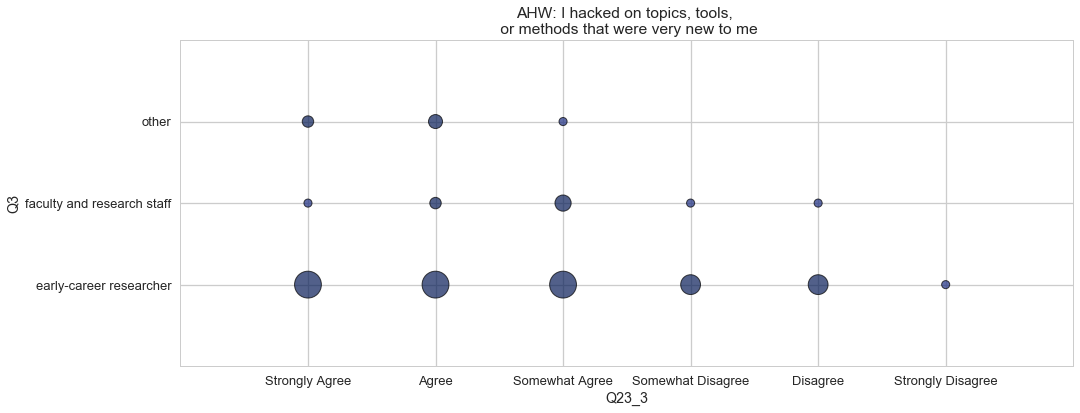

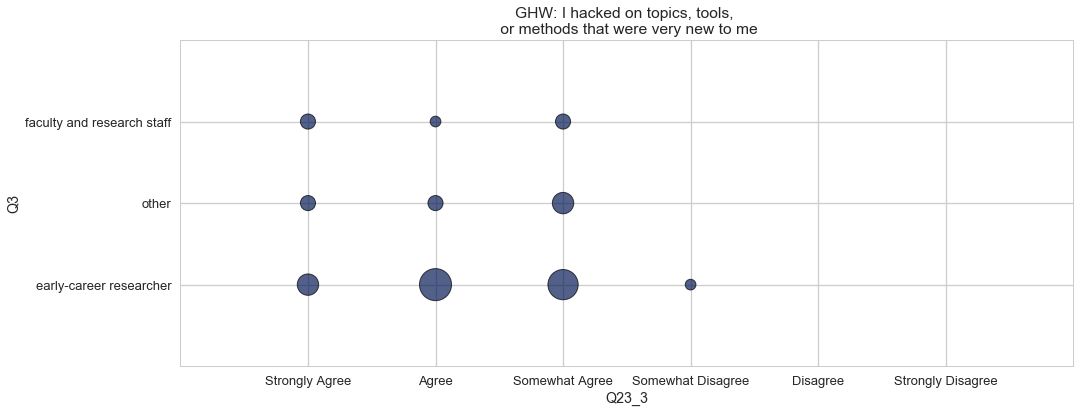

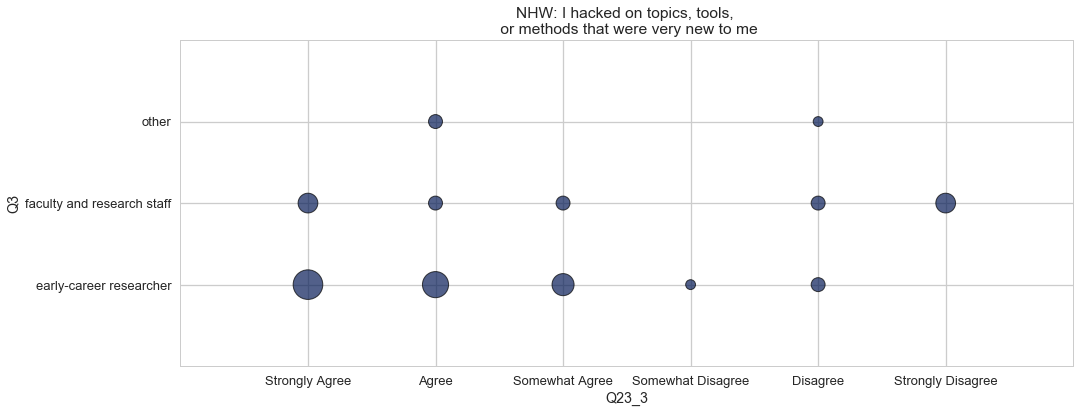

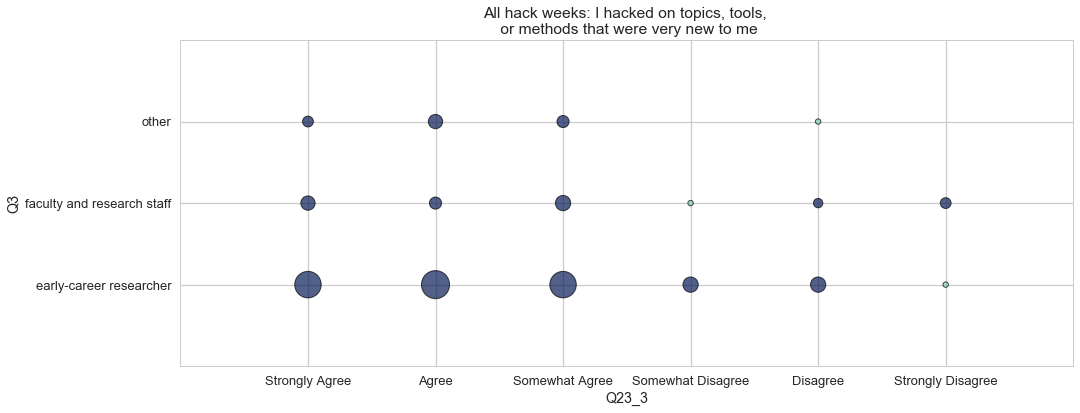

In [172]:
# question label
q1 = "Q23_3"

# demographic category
q2 = "Q3"

# title for the plot
title = 'I hacked on topics, tools, \n or methods that were very new to me'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

There are 3 unique categories in q2.
Correlation for AHW: 3.7913241669763407 for 6 degrees of freedom.
p-value for the correlation for AHW: 0.7048913309368743
The expected frequencies in each bin are: [[19.60655738  3.83606557  2.55737705]
 [18.85245902  3.68852459  2.45901639]
 [ 6.78688525  1.32786885  0.8852459 ]
 [ 0.75409836  0.14754098  0.09836066]]
Effect size for AHW: 0.0 for 1.9333333333333331 degrees of freedom.
Kruskal-Wallis H for AHW: 0.9703996486604833, p = 0.6155741777758128

Correlation for GHW: 10.613478260869565 for 4 degrees of freedom.
p-value for the correlation for GHW: 0.031269241461348796
The expected frequencies in each bin are: [[8.94444444 1.94444444 3.11111111]
 [9.58333333 2.08333333 3.33333333]
 [4.47222222 0.97222222 1.55555556]]
Effect size for GHW: 0.3094143887148523 for 1.8857142857142857 degrees of freedom.
Kruskal-Wallis H for GHW: 8.716877356776157, p = 0.012798354405546209

Correlation for NHW: 5.064102564102564 for 4 degrees of freedom.
p-value fo

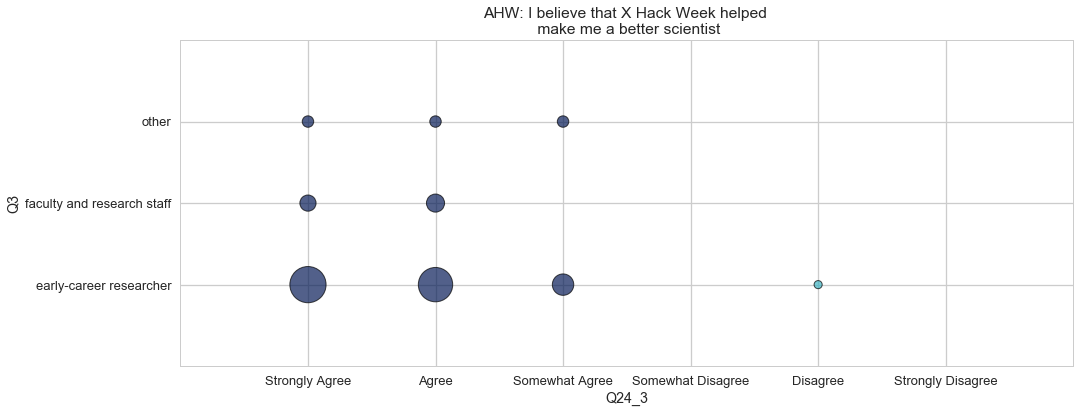

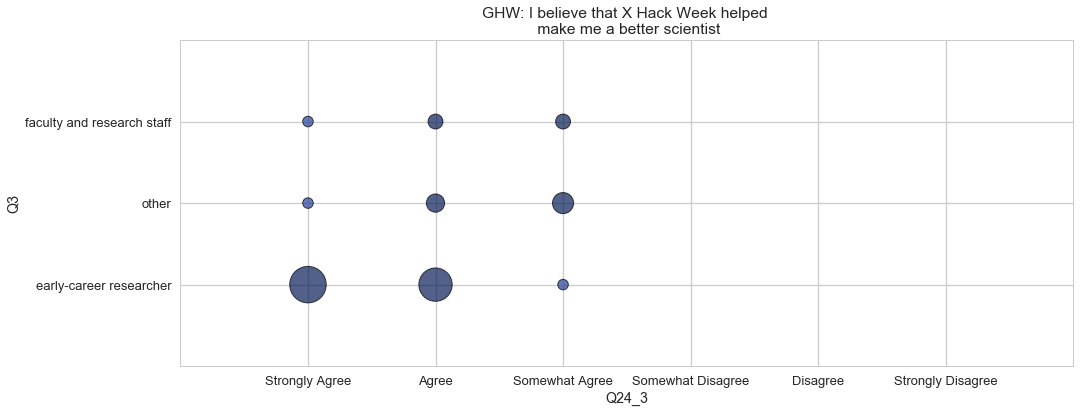

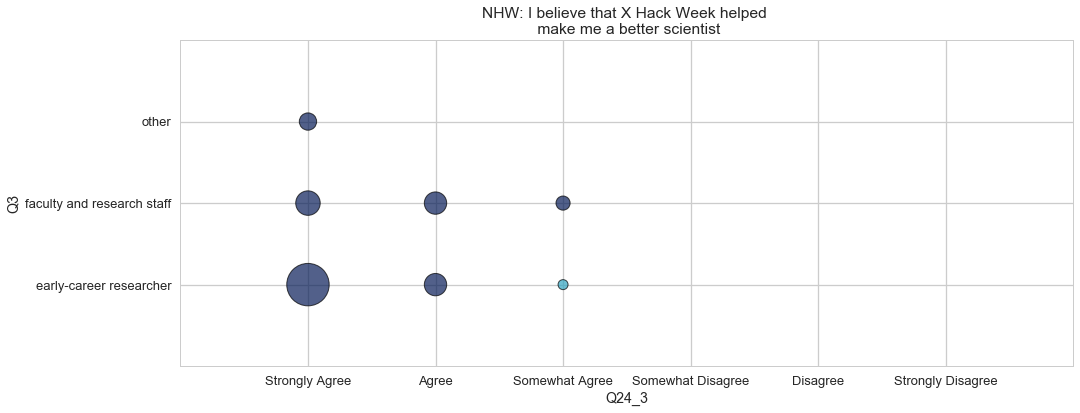

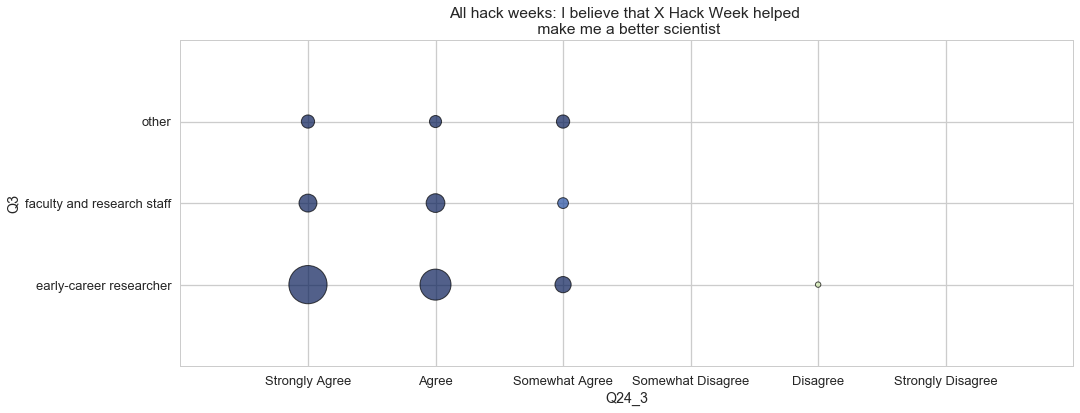

In [173]:
# question label
q1 = "Q24_3"

# demographic category
q2 = "Q3"

# title for the plot
title = 'I believe that X Hack Week helped \n make me a better scientist'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]


test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

There are 3 unique categories in q2.
Correlation for AHW: 9.894170875420876 for 6 degrees of freedom.
p-value for the correlation for AHW: 0.12918004403450886
The expected frequencies in each bin are: [[17.89830508  3.66101695  2.44067797]
 [14.16949153  2.89830508  1.93220339]
 [11.18644068  2.28813559  1.52542373]
 [ 0.74576271  0.15254237  0.10169492]]
Effect size for AHW: 0.1824063620829354 for 1.9310344827586206 degrees of freedom.
Kruskal-Wallis H for AHW: 0.42219088636194296, p = 0.8096967831566259

Correlation for GHW: 12.414715719063548 for 4 degrees of freedom.
p-value for the correlation for GHW: 0.014519605630552424
The expected frequencies in each bin are: [[ 8.54285714  1.85714286  2.6       ]
 [11.82857143  2.57142857  3.6       ]
 [ 2.62857143  0.57142857  0.8       ]]
Effect size for GHW: 0.35487694952929044 for 1.8823529411764706 degrees of freedom.
Kruskal-Wallis H for GHW: 10.536769822043311, p = 0.005151924673974893

Correlation for NHW: 7.423003241968758 for 6 deg

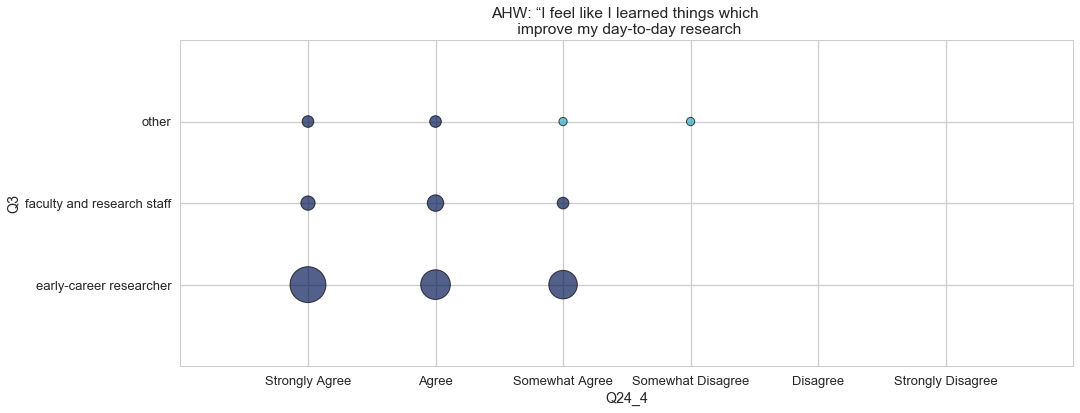

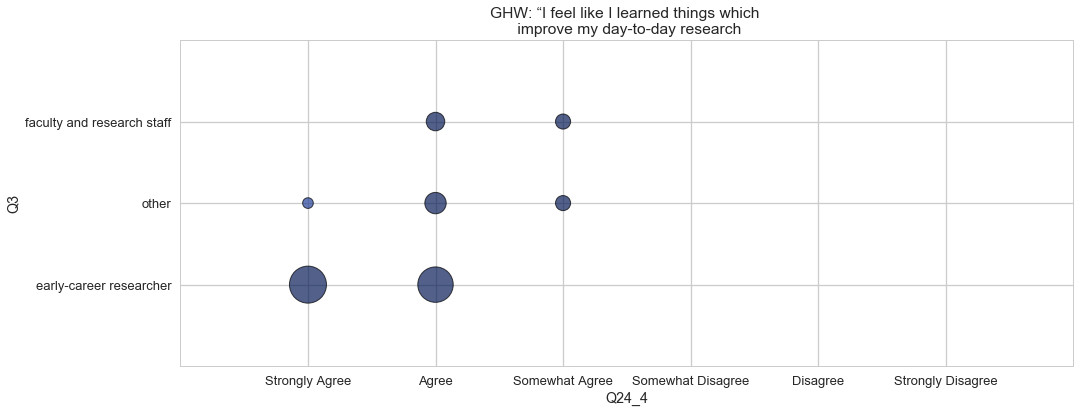

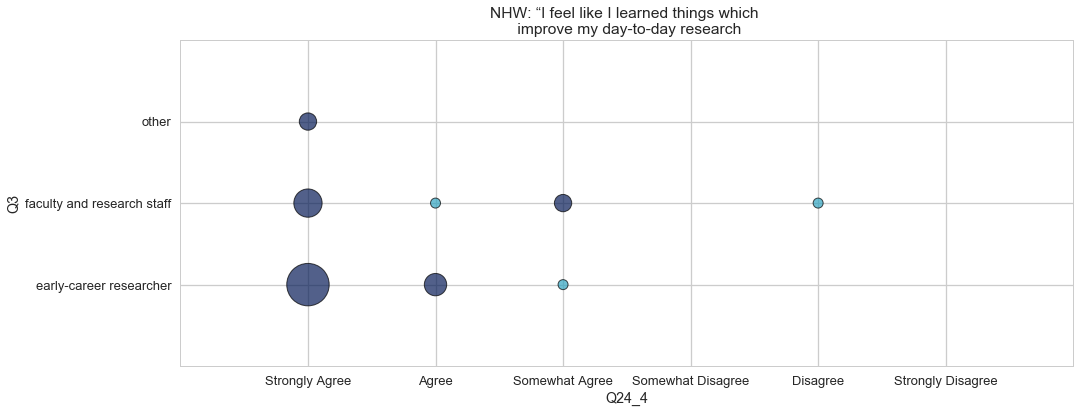

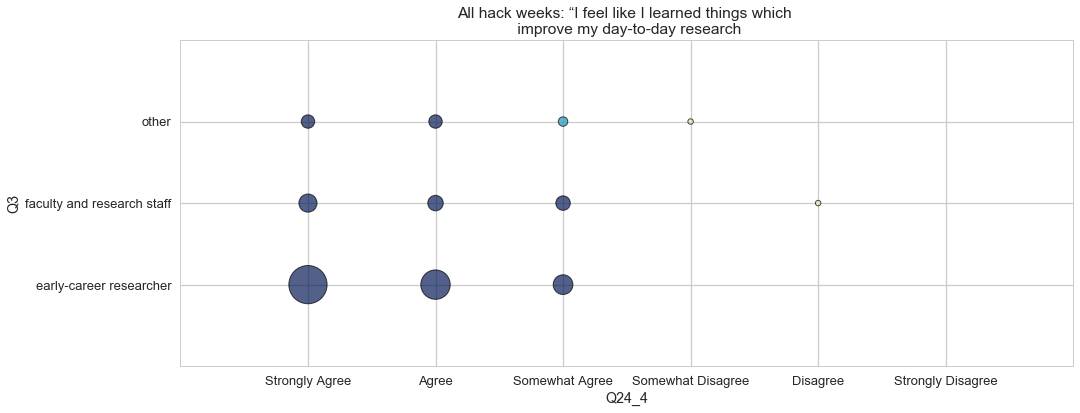

In [174]:
# question label
q1 = "Q24_4"

# demographic category
q2 = "Q3"

# title for the plot
title = '“I feel like I learned things which \n improve my day-to-day research'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

*Interpretation* : _[need to look up effect size first!]_

### Do more senior participants tend to teach more to junior participants than the other way around?


There are 3 unique categories in q2.
Correlation for AHW: 13.65051499877856 for 10 degrees of freedom.
p-value for the correlation for AHW: 0.1895377038028382
The expected frequencies in each bin are: [[ 9.04918033  1.7704918   1.18032787]
 [14.32786885  2.80327869  1.86885246]
 [12.81967213  2.50819672  1.67213115]
 [ 4.52459016  0.8852459   0.59016393]
 [ 3.01639344  0.59016393  0.39344262]
 [ 2.26229508  0.44262295  0.29508197]]
Effect size for AHW: 0.17187445459154477 for 1.9333333333333331 degrees of freedom.
Kruskal-Wallis H for AHW: 0.2342870755508414, p = 0.8894575132474022

Correlation for GHW: 13.679347826086957 for 10 degrees of freedom.
p-value for the correlation for GHW: 0.18812629115236532
The expected frequencies in each bin are: [[0.63888889 0.13888889 0.22222222]
 [7.66666667 1.66666667 2.66666667]
 [7.66666667 1.66666667 2.66666667]
 [3.83333333 0.83333333 1.33333333]
 [1.91666667 0.41666667 0.66666667]
 [1.27777778 0.27777778 0.44444444]]
Effect size for GHW: 0.2235

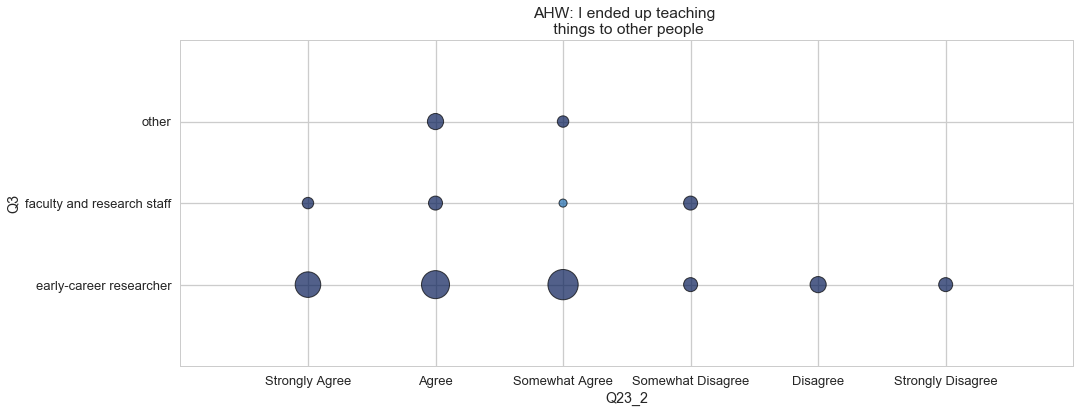

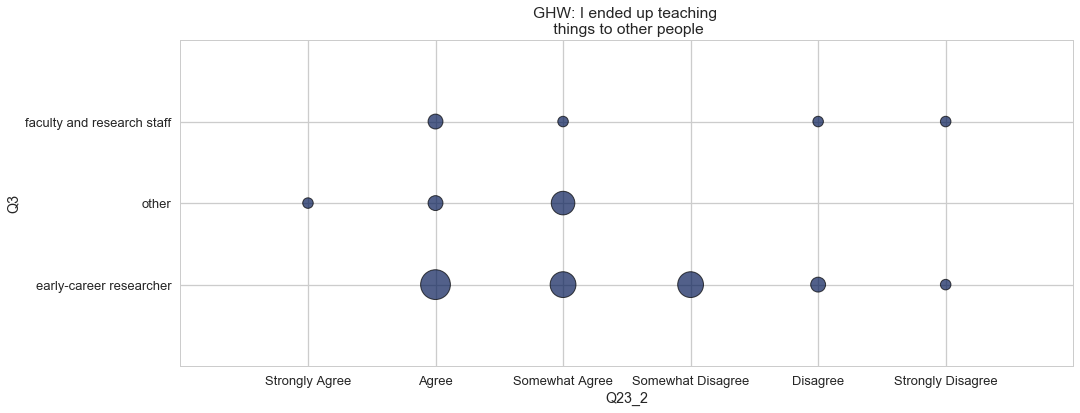

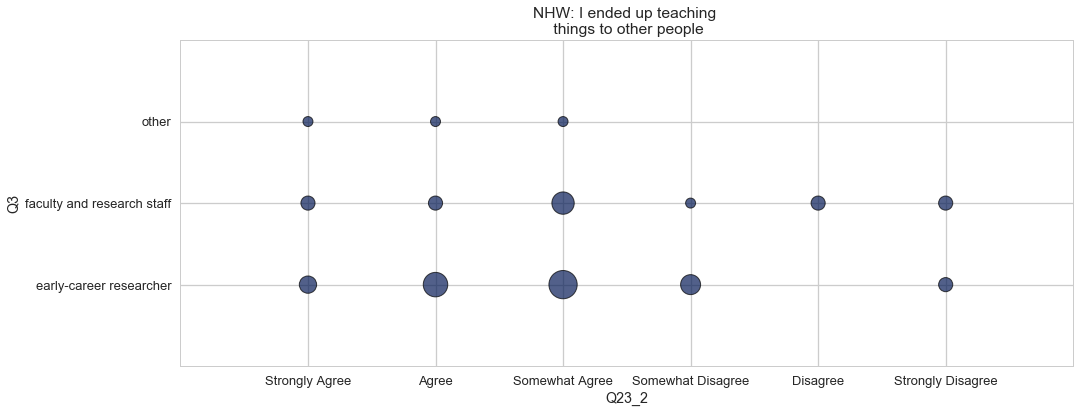

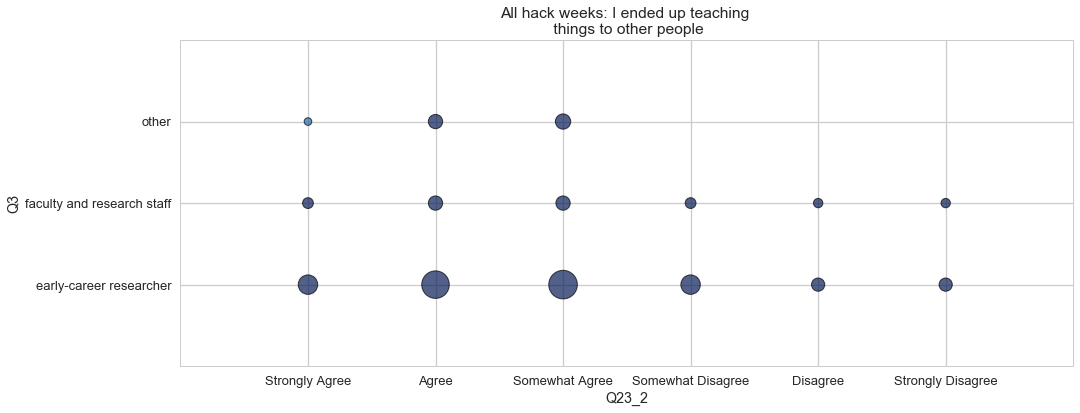

In [175]:
# question label
q1 = "Q23_2"

# demographic category
q2 = "Q3"

# title for the plot
title = 'I ended up teaching \n things to other people'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]


test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

That doesn't look like teaching is restricted to senior participants! How interesting and perhaps a confirmation of our earlier hypothesis that hack weeks are where young people teach the old?

### Do more senior participants tend to build more connections than more junior participants? Or the other way around? Could be either way.

I'm curious whether different participants at different career stages approach forming collaborations and networking differently. Maybe hack weeks are more useful for certain categories of participants:

There are 3 unique categories in q2.
Correlation for AHW: 9.894170875420876 for 6 degrees of freedom.
p-value for the correlation for AHW: 0.12918004403450886
The expected frequencies in each bin are: [[17.89830508  3.66101695  2.44067797]
 [14.16949153  2.89830508  1.93220339]
 [11.18644068  2.28813559  1.52542373]
 [ 0.74576271  0.15254237  0.10169492]]
Effect size for AHW: 0.1824063620829354 for 1.9310344827586206 degrees of freedom.
Kruskal-Wallis H for AHW: 0.42219088636194296, p = 0.8096967831566259

Correlation for GHW: 12.414715719063548 for 4 degrees of freedom.
p-value for the correlation for GHW: 0.014519605630552424
The expected frequencies in each bin are: [[ 8.54285714  1.85714286  2.6       ]
 [11.82857143  2.57142857  3.6       ]
 [ 2.62857143  0.57142857  0.8       ]]
Effect size for GHW: 0.35487694952929044 for 1.8823529411764706 degrees of freedom.
Kruskal-Wallis H for GHW: 10.536769822043311, p = 0.005151924673974893

Correlation for NHW: 7.423003241968758 for 6 deg

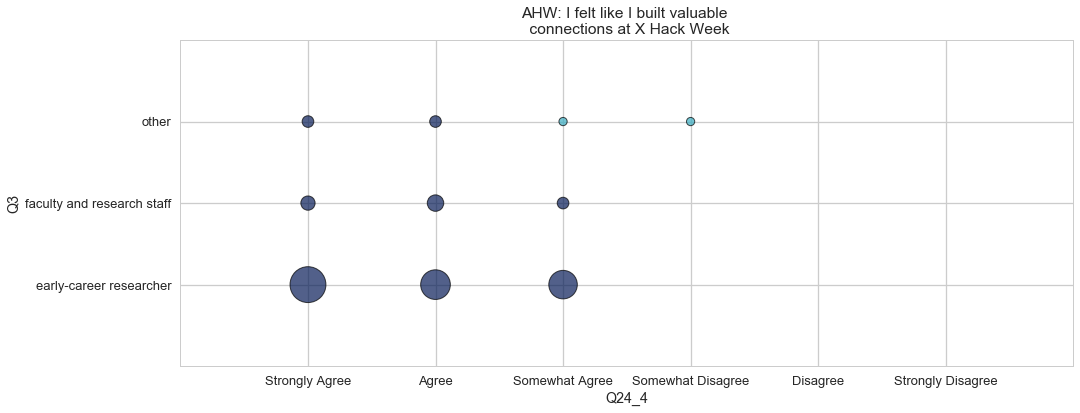

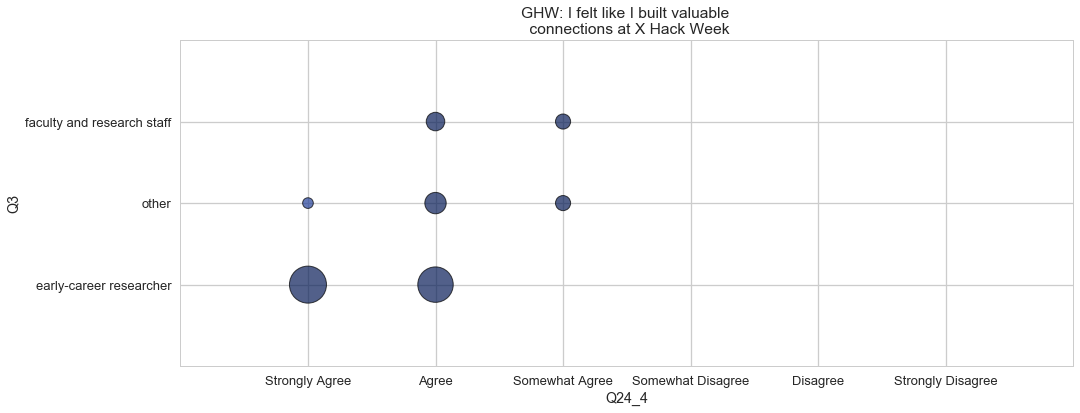

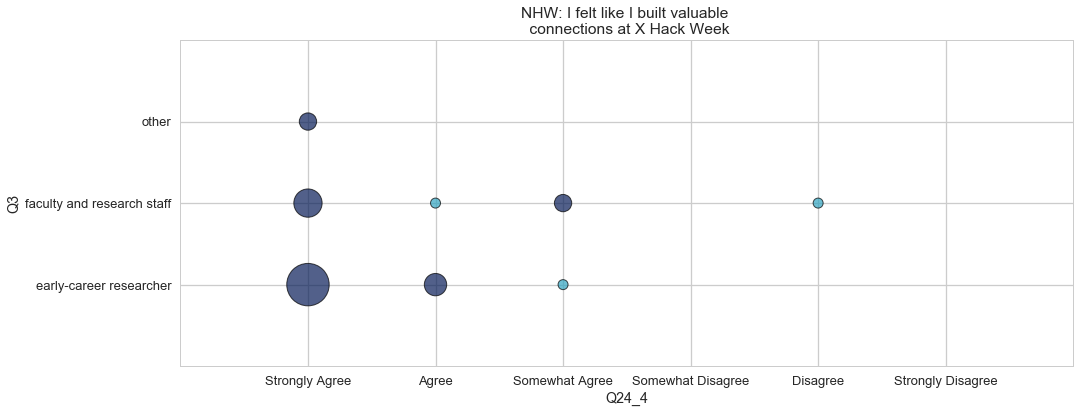

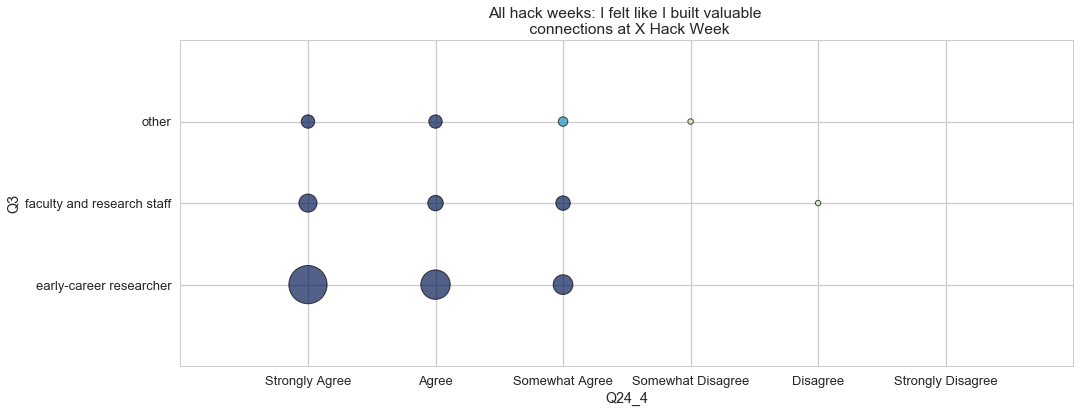

In [176]:
# question label
q1 = "Q24_4"

# demographic category
q2 = "Q3"

# title for the plot
title = 'I felt like I built valuable \n connections at X Hack Week'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

**Interpretation**: Needs more interpretation. :)

### Are junior participants more likely to do open science already, and are there different learning outcomes as a function of seniority?

Here are a few possible hypotheses:
* more junior participants are more likely to have already have had exposure to reproducibility and putting code online etc.
* more senior participants have a more pronounced learning outcomes with respect to reproducibility 

Let's test the first one!

There are 3 unique categories in q2.
Correlation for AHW: 2.91758172087456 for 10 degrees of freedom.
p-value for the correlation for AHW: 0.9832975873707731
The expected frequencies in each bin are: [[12.81967213  2.50819672  1.67213115]
 [ 9.04918033  1.7704918   1.18032787]
 [ 8.29508197  1.62295082  1.08196721]
 [ 2.26229508  0.44262295  0.29508197]
 [ 6.03278689  1.18032787  0.78688525]
 [ 7.54098361  1.47540984  0.98360656]]
Effect size for AHW: 0.0 for 1.9333333333333331 degrees of freedom.
Kruskal-Wallis H for AHW: 0.09781259184174672, p = 0.9522703571348471

Correlation for GHW: 13.52119565217391 for 8 degrees of freedom.
p-value for the correlation for GHW: 0.09513096916960916
The expected frequencies in each bin are: [[5.11111111 1.11111111 1.77777778]
 [2.55555556 0.55555556 0.88888889]
 [1.27777778 0.27777778 0.44444444]
 [6.38888889 1.38888889 2.22222222]
 [7.66666667 1.66666667 2.66666667]]
Effect size for GHW: 0.27921987871128545 for 1.8857142857142857 degrees of freedo

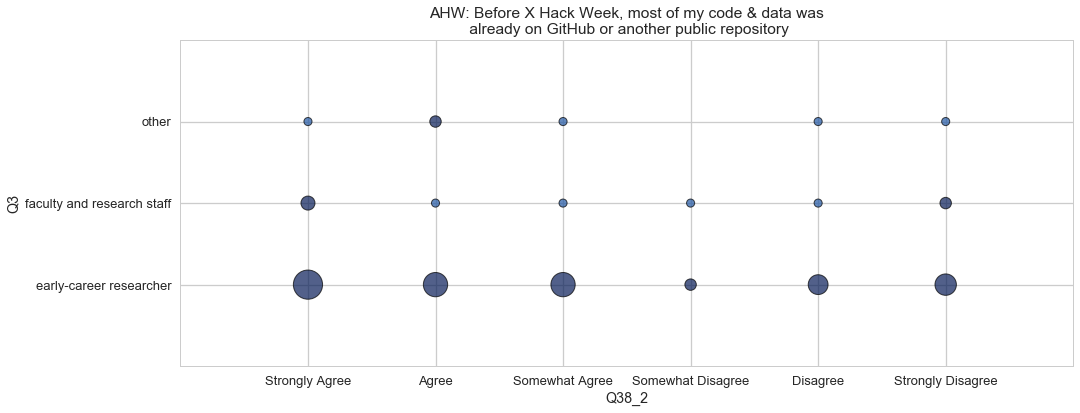

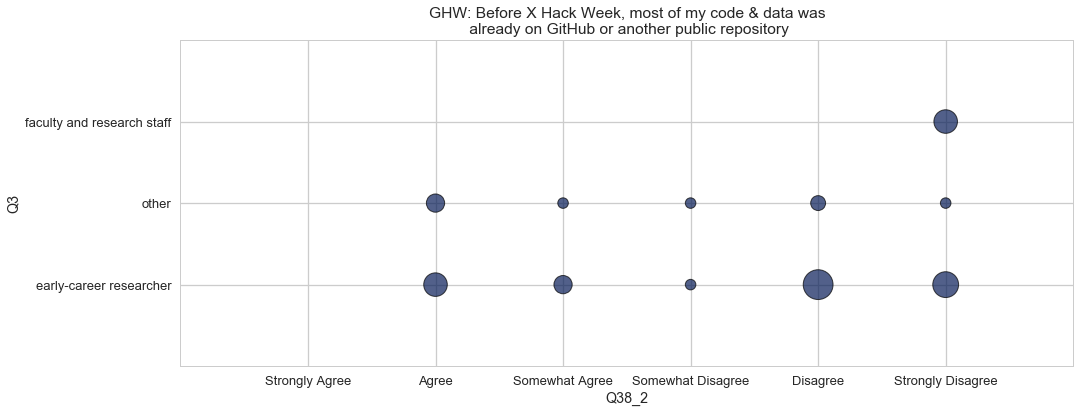

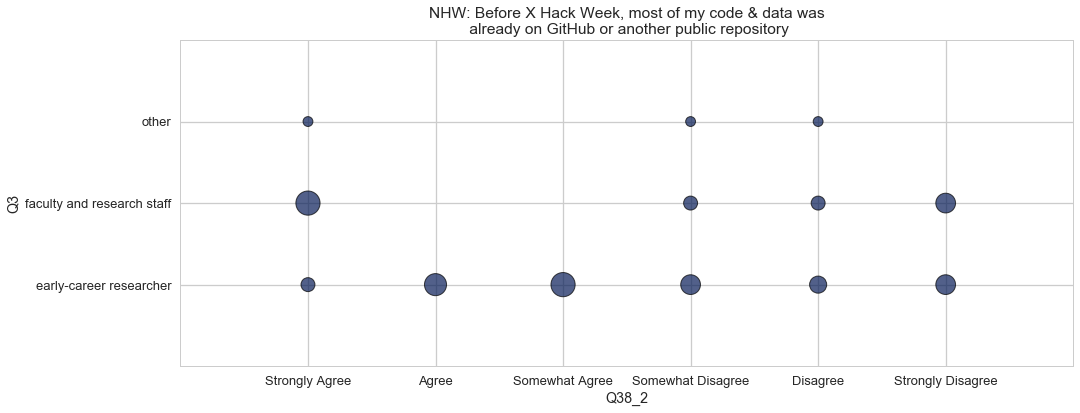

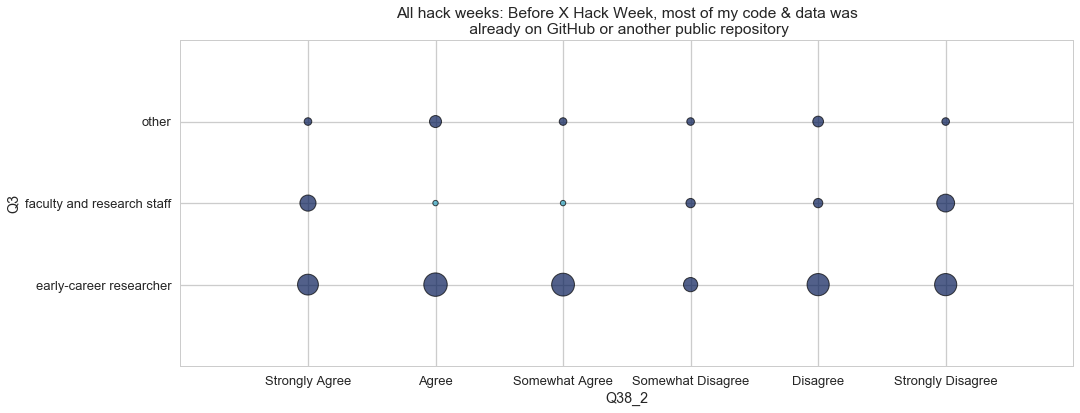

In [177]:
# question label
q1 = "Q38_2"

# demographic category
q2 = "Q3"

# title for the plot
title = 'Before X Hack Week, most of my code & data was\n already on GitHub or another public repository'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]


test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

Hmmm, doesn't look like there's a strong effect for career stage as a function of whether more junior participants are more likely to have adopted good coding and reproducibility practices.

What about whether people put code online during the hack week?

There are 3 unique categories in q2.
Correlation for AHW: 11.07744416482235 for 10 degrees of freedom.
p-value for the correlation for AHW: 0.35151631839339
The expected frequencies in each bin are: [[21.86885246  4.27868852  2.85245902]
 [12.06557377  2.36065574  1.57377049]
 [ 5.27868852  1.03278689  0.68852459]
 [ 3.01639344  0.59016393  0.39344262]
 [ 1.50819672  0.29508197  0.19672131]
 [ 2.26229508  0.44262295  0.29508197]]
Effect size for AHW: 0.0878795570504957 for 1.9333333333333331 degrees of freedom.
Kruskal-Wallis H for AHW: 2.751043742571716, p = 0.2527076805041657

Correlation for GHW: 9.487962906658558 for 10 degrees of freedom.
p-value for the correlation for GHW: 0.4865025569333141
The expected frequencies in each bin are: [[7.02777778 1.52777778 2.44444444]
 [8.30555556 1.80555556 2.88888889]
 [1.27777778 0.27777778 0.44444444]
 [1.27777778 0.27777778 0.44444444]
 [3.19444444 0.69444444 1.11111111]
 [1.91666667 0.41666667 0.66666667]]
Effect size for GHW: 0.0 for 1.88

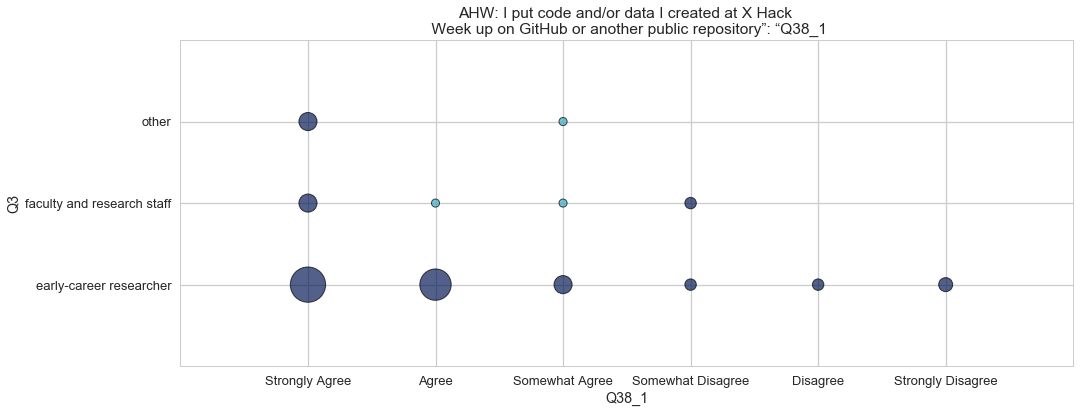

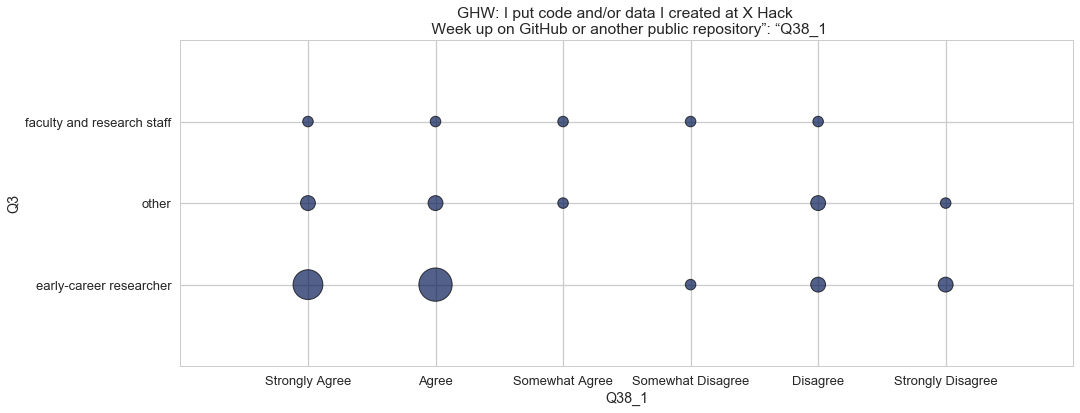

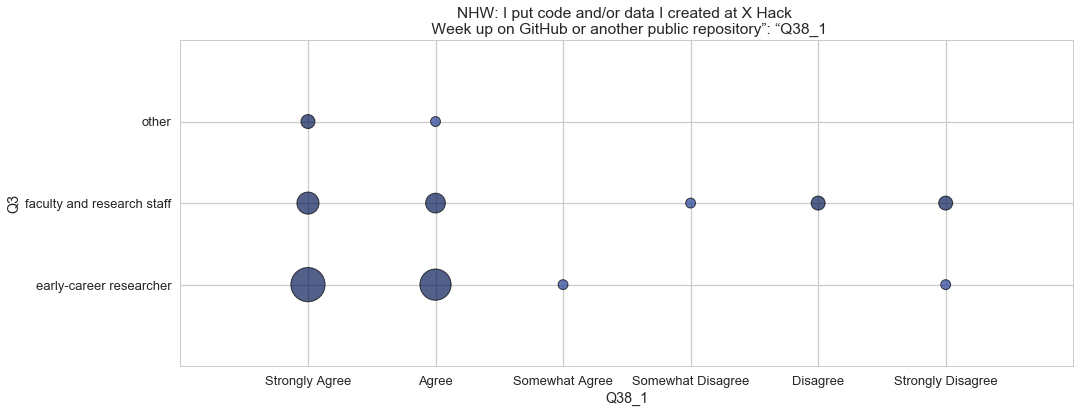

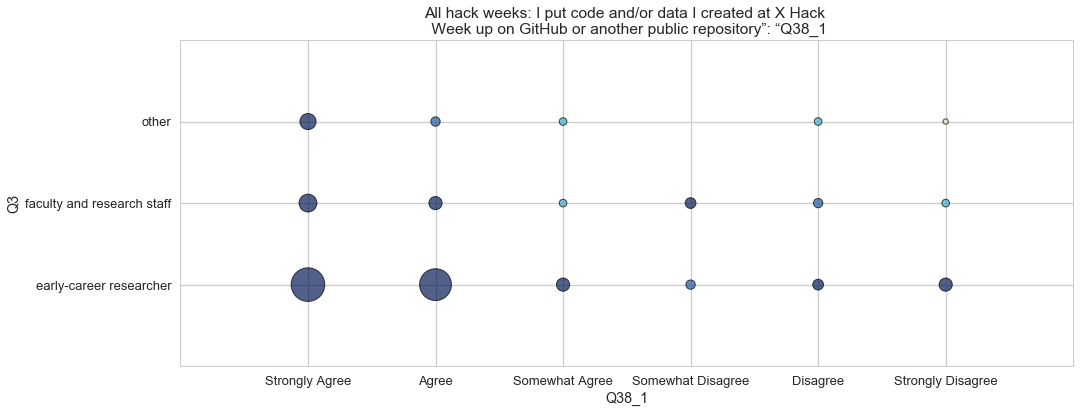

In [178]:
# question label
q1 = "Q38_1"

# demographic category
q2 = "Q3"

# title for the plot
title = 'I put code and/or data I created at X Hack \n Week up on GitHub or another public repository”: “Q38_1'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

And what about comfort with respect to open science?

There are 3 unique categories in q2.
Correlation for AHW: 16.212777853332728 for 10 degrees of freedom.
p-value for the correlation for AHW: 0.09370124566343678
The expected frequencies in each bin are: [[13.34482759  2.79310345  1.86206897]
 [11.86206897  2.48275862  1.65517241]
 [14.0862069   2.94827586  1.96551724]
 [ 2.22413793  0.46551724  0.31034483]
 [ 0.74137931  0.15517241  0.10344828]
 [ 0.74137931  0.15517241  0.10344828]]
Effect size for AHW: 0.23224687493130042 for 1.9298245614035086 degrees of freedom.
Kruskal-Wallis H for AHW: 0.04085999920697069, p = 0.9797772788721094

Correlation for GHW: 7.364703557312254 for 6 degrees of freedom.
p-value for the correlation for GHW: 0.2884318852060026
The expected frequencies in each bin are: [[ 2.55555556  0.55555556  0.88888889]
 [12.77777778  2.77777778  4.44444444]
 [ 7.02777778  1.52777778  2.44444444]
 [ 0.63888889  0.13888889  0.22222222]]
Effect size for GHW: 0.13258093345815883 for 1.8857142857142857 degrees of freedom.
Kru

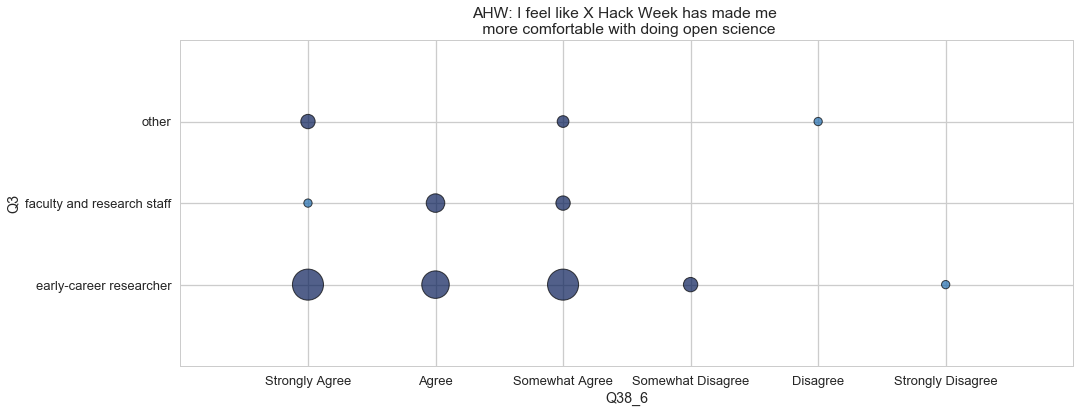

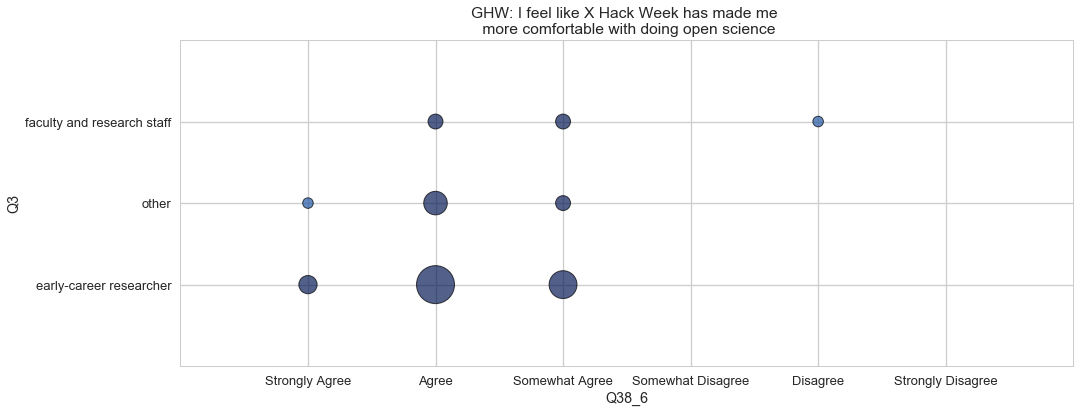

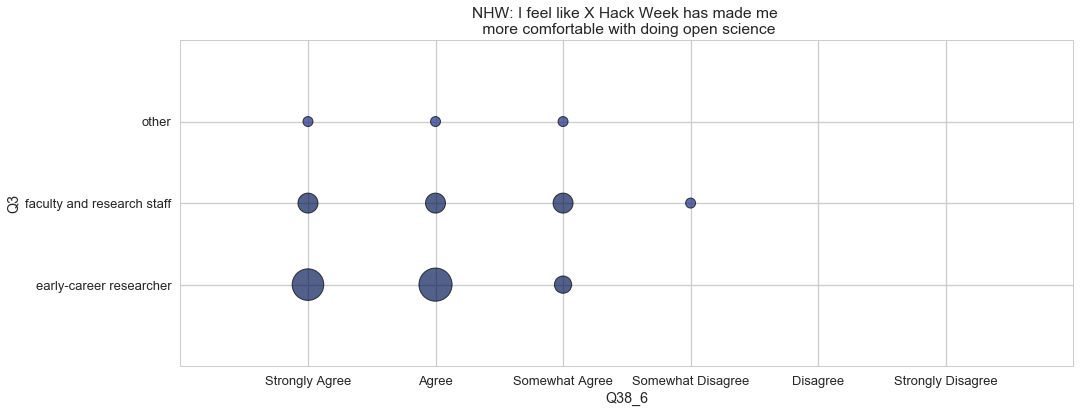

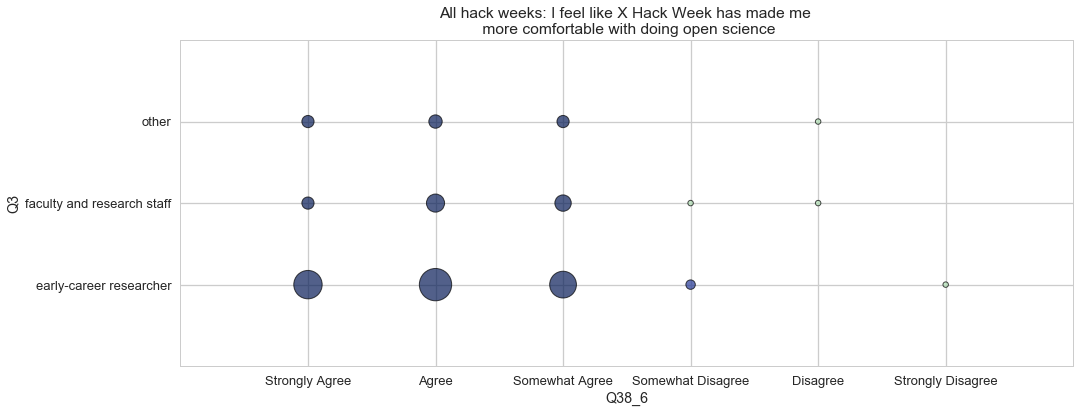

In [179]:
# question label
q1 = "Q38_6"

# demographic category
q2 = "Q3"

# title for the plot
title = 'I feel like X Hack Week has made me \n more comfortable with doing open science'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

### Are there differences between the different types of hack weeks in terms of reproducibility and code sharing before/during hack weeks?

We should check whether there's any significant difference between hack weeks for the reproducibility questions:

In [145]:
# question label
q1 = "Q38_1"

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

nhw_tmp = NHWdata[[q1, q2]]
ghw_tmp = GHWdata[[q1, q2]]
ahw_tmp = AHWdata[[q1, q2]]

for i, ktmp in enumerate(k[::-1]):
    ahw_tmp.loc[ahw_tmp[q1] == ktmp, q1 + "_num"] = i+1
    ghw_tmp.loc[ghw_tmp[q1] == ktmp, q1 + "_num"] = i+1
    nhw_tmp.loc[nhw_tmp[q1] == ktmp, q1 + "_num"] = i+1


nhw_tmp = nhw_tmp[q1 + "_num"].dropna()
ghw_tmp = ghw_tmp[q1 + "_num"].dropna()
ahw_tmp = ahw_tmp[q1 + "_num"].dropna()

print("len(ahw): " + str(len(ahw_tmp)))
print("len(ghw): " + str(len(ghw_tmp)))
print("len(nhw): " + str(len(nhw_tmp)))

k_nhw = nhw_tmp.unique()

nhw_tmp = pd.Categorical(nhw_tmp, categories=k_nhw)

k_ghw = ghw_tmp.unique()
ghw_tmp = pd.Categorical(ghw_tmp, categories=k_ghw)

k_ahw = ahw_tmp.unique()
ahw_tmp = pd.Categorical(ahw_tmp, categories=k_ahw)
    
    
ag_m, ag_pval = scipy.stats.mannwhitneyu(ahw_tmp, ghw_tmp)

an_m, an_pval = scipy.stats.mannwhitneyu(ahw_tmp, nhw_tmp)

gn_m, gn_pval = scipy.stats.mannwhitneyu(ghw_tmp, nhw_tmp)


/Users/danielahuppenkothen/work/sw/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danielahuppenkothen/work/sw/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


len(ahw): 62
len(ghw): 72
len(nhw): 83


In [159]:
ag_pval

0.17699890417444775

In [160]:
an_pval

0.16296978460409128

In [161]:
gn_pval

0.021667264225033032

**Interpretation**: Need more interpretation!

### Do minority participants self-report less successful learning outcomes, teaching and participation in hacks?

One issue we have at hack weeks is impostor syndrome. We also know that minority participants tend to experience proportionally more impostor syndrome. We work hard at the various hack weeks to represent minorities well, and integrate them into the group. Still, we want to see if there are significant differences in self-reported outcomes between minority and non-minority participants.

Let's compare teaching outcomes for gender/race:

Correlation for AHW: 9.313210519131571 for 10 degrees of freedom.
p-value for the correlation for AHW: 0.5026590955025871
The expected frequencies in each bin are: [[ 3.60655738  6.67213115  0.72131148]
 [ 6.2295082  11.52459016  1.24590164]
 [ 5.90163934 10.91803279  1.18032787]
 [ 1.96721311  3.63934426  0.39344262]
 [ 1.31147541  2.42622951  0.26229508]
 [ 0.98360656  1.81967213  0.19672131]]
Effect size for AHW: 0.0 for 1.9333333333333331 degrees of freedom. 

Correlation for GHW: 14.249999999999998 for 10 degrees of freedom.
p-value for the correlation for GHW: 0.16189070453677037
The expected frequencies in each bin are: [[0.41666667 0.55555556 0.02777778]
 [5.         6.66666667 0.33333333]
 [5.         6.66666667 0.33333333]
 [2.5        3.33333333 0.16666667]
 [1.25       1.66666667 0.08333333]
 [0.83333333 1.11111111 0.05555556]]
Effect size for GHW: 0.2416536046626754 for 1.8857142857142857 degrees of freedom. 

Correlation for NHW: 3.1714206150296373 for 5 degrees of freedo

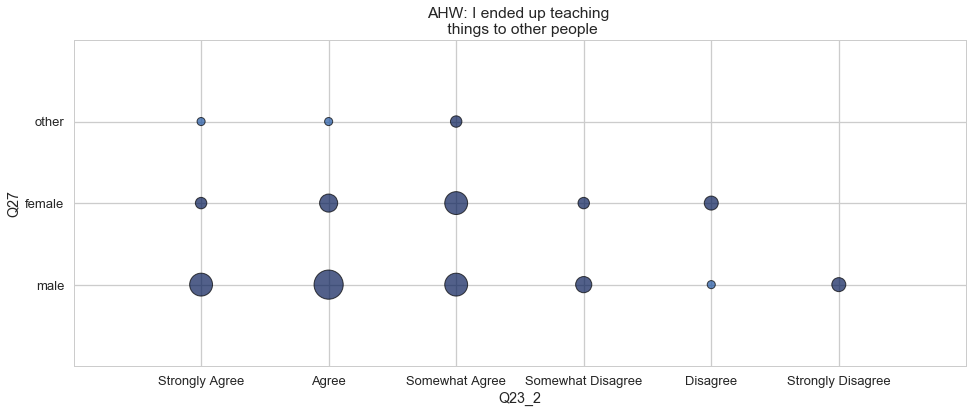

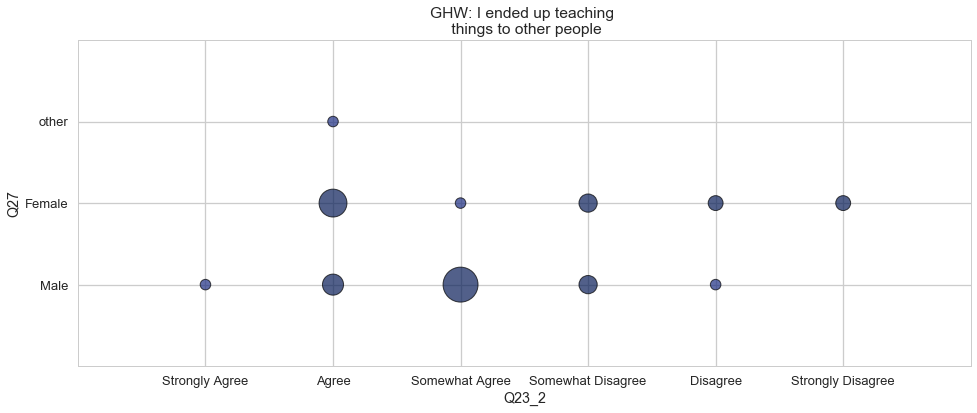

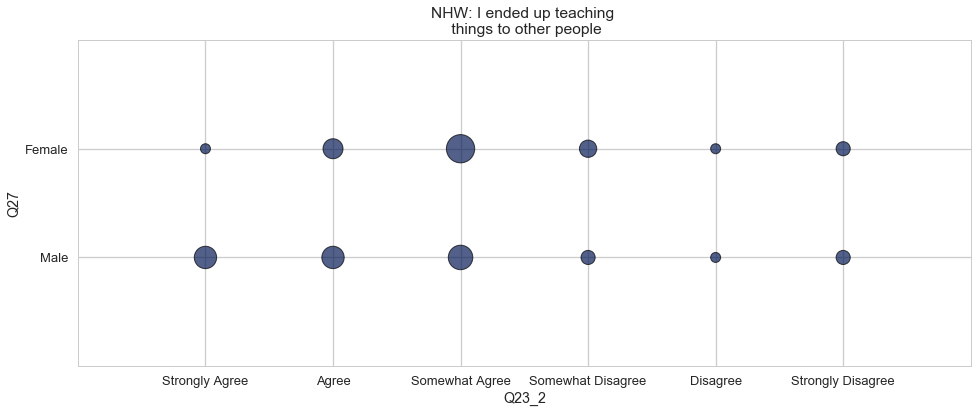

In [162]:
# question label
q1 = "Q23_2"

# demographic category
q2 = "Q27"

# title for the plot
title = 'I ended up teaching \n things to other people'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

Correlation for AHW: 5.631276455135953 for 5 degrees of freedom.
p-value for the correlation for AHW: 0.3437655425902036
The expected frequencies in each bin are: [[ 3.3442623   8.6557377 ]
 [ 5.29508197 13.70491803]
 [ 4.73770492 12.26229508]
 [ 1.67213115  4.32786885]
 [ 1.1147541   2.8852459 ]
 [ 0.83606557  2.16393443]]
Effect size for AHW: 0.09557679028898285 for 0.9833333333333334 degrees of freedom. 

Correlation for GHW: 1.2854020979020977 for 4 degrees of freedom.
p-value for the correlation for GHW: 0.8638473700369804
The expected frequencies in each bin are: [[2.82352941 9.17647059]
 [2.58823529 8.41176471]
 [1.41176471 4.58823529]
 [0.70588235 2.29411765]
 [0.47058824 1.52941176]]
Effect size for GHW: 0.0 for 0.9696969696969697 degrees of freedom. 

Correlation for NHW: 3.055000000000001 for 5 degrees of freedom.
p-value for the correlation for NHW: 0.6915066237745786
The expected frequencies in each bin are: [[2.30769231 3.69230769]
 [3.46153846 5.53846154]
 [5.         8.

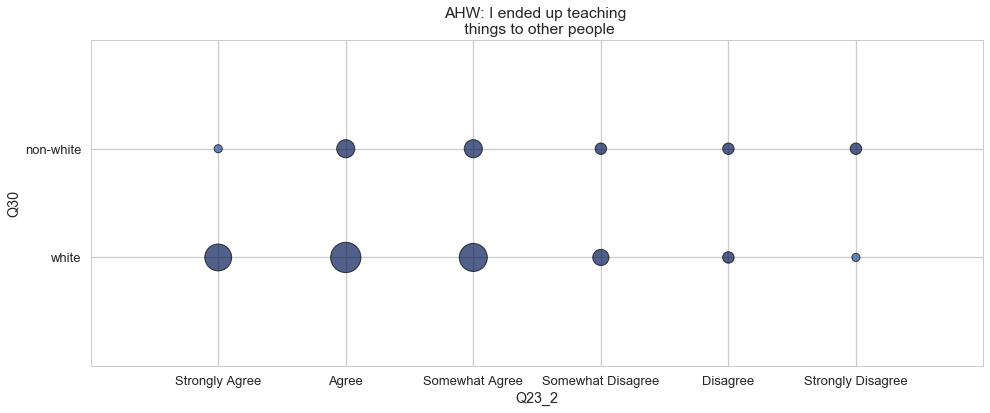

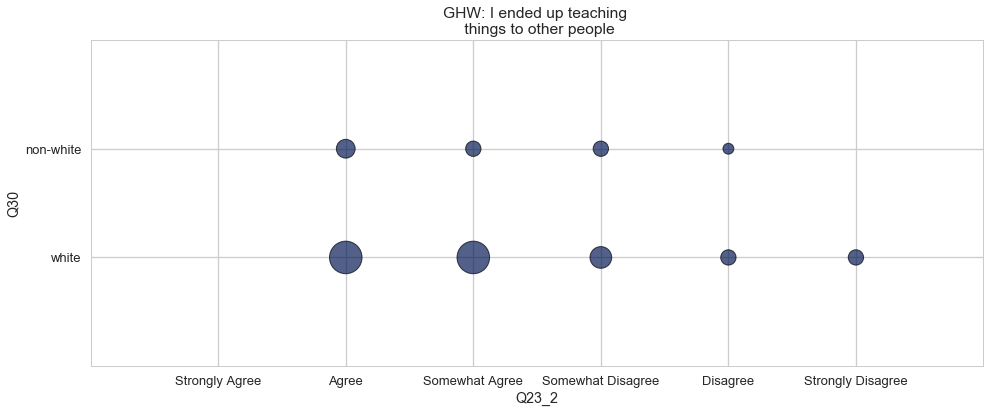

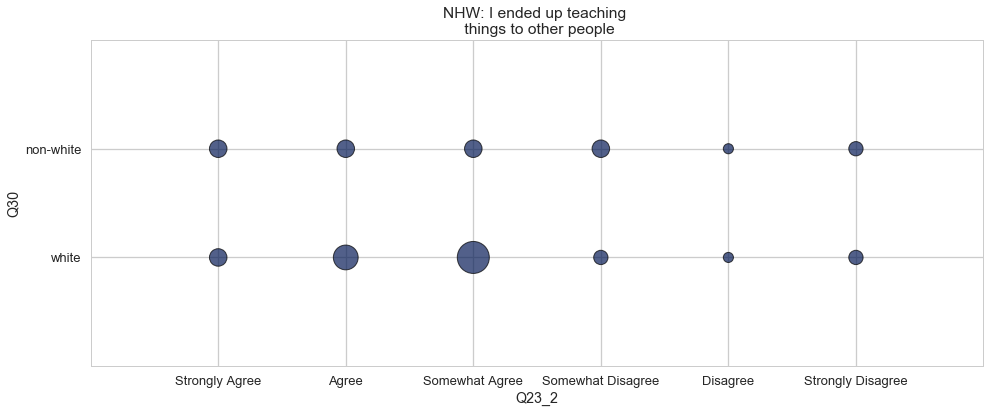

In [163]:
# question label
q1 = "Q23_2"

# demographic category
q2 = "Q30"

# title for the plot
title = 'I ended up teaching \n things to other people'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

What about learning?

Again we start with gender:

Correlation for AHW: 3.698613086770982 for 6 degrees of freedom.
p-value for the correlation for AHW: 0.7173846094218896
The expected frequencies in each bin are: [[ 7.6        14.8         1.6       ]
 [ 6.33333333 12.33333333  1.33333333]
 [ 4.75        9.25        1.        ]
 [ 0.31666667  0.61666667  0.06666667]]
Effect size for AHW: 0.0 for 1.9322033898305087 degrees of freedom. 

Correlation for GHW: 7.294946768630979 for 4 degrees of freedom.
p-value for the correlation for GHW: 0.12109866279969662
The expected frequencies in each bin are: [[5.57142857 7.05714286 0.37142857]
 [7.71428571 9.77142857 0.51428571]
 [1.71428571 2.17142857 0.11428571]]
Effect size for GHW: 0.21960617157833165 for 1.8823529411764706 degrees of freedom. 

Correlation for NHW: 7.620199925100106 for 3 degrees of freedom.
p-value for the correlation for NHW: 0.05454911993434397
The expected frequencies in each bin are: [[13.775 15.225]
 [ 2.85   3.15 ]
 [ 1.9    2.1  ]
 [ 0.475  0.525]]
Effect size for NH

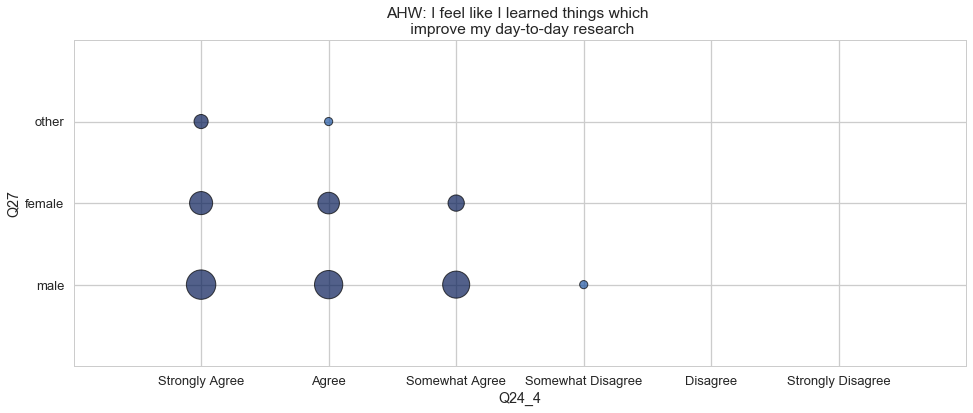

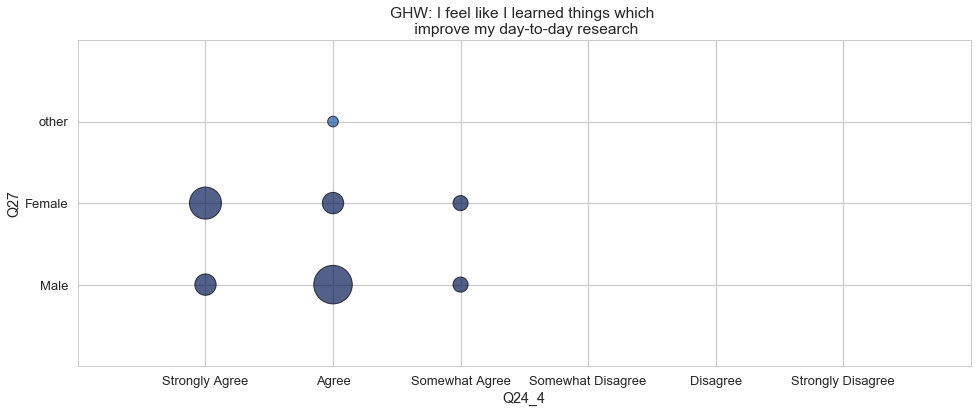

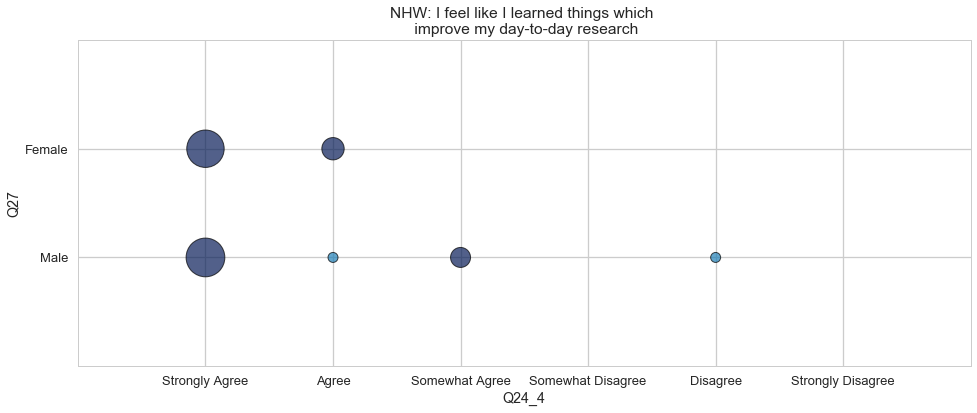

In [165]:
# question label
q1 = "Q24_4"

# demographic category
q2 = "Q27"

# title for the plot
title = 'I feel like I learned things which \n improve my day-to-day research'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

And the same for race/ethnicity:

Correlation for AHW: 0.9686678463094033 for 3 degrees of freedom.
p-value for the correlation for AHW: 0.8088327907452683
The expected frequencies in each bin are: [[ 6.23728814 16.76271186]
 [ 5.42372881 14.57627119]
 [ 4.06779661 10.93220339]
 [ 0.27118644  0.72881356]]
Effect size for AHW: 0.0 for 0.9827586206896552 degrees of freedom. 

Correlation for GHW: 0.006286982248520694 for 2 degrees of freedom.
p-value for the correlation for GHW: 0.9968614444709427
The expected frequencies in each bin are: [[ 3.05882353  9.94117647]
 [ 4.         13.        ]
 [ 0.94117647  3.05882353]]
Effect size for GHW: 0.0 for 0.9696969696969697 degrees of freedom. 

Correlation for NHW: 2.785714285714285 for 3 degrees of freedom.
p-value for the correlation for NHW: 0.42585700239923685
The expected frequencies in each bin are: [[11.48717949 16.51282051]
 [ 2.46153846  3.53846154]
 [ 1.64102564  2.35897436]
 [ 0.41025641  0.58974359]]
Effect size for NHW: 0.0 for 0.9736842105263157 degrees of freedom

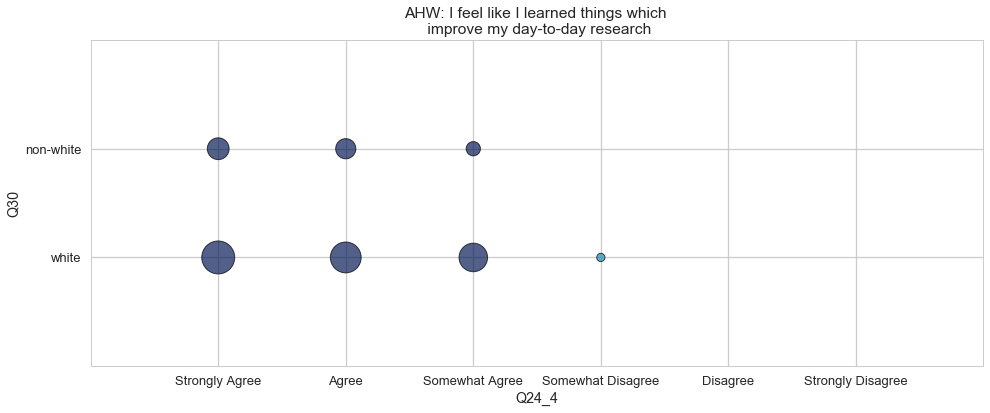

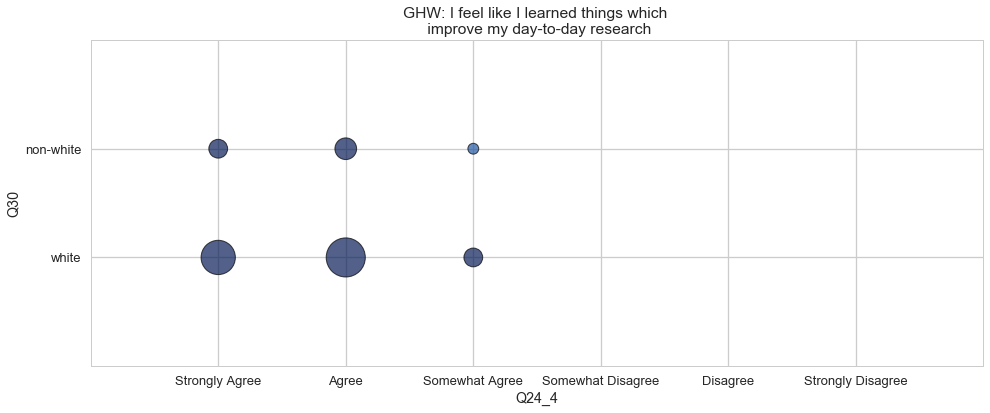

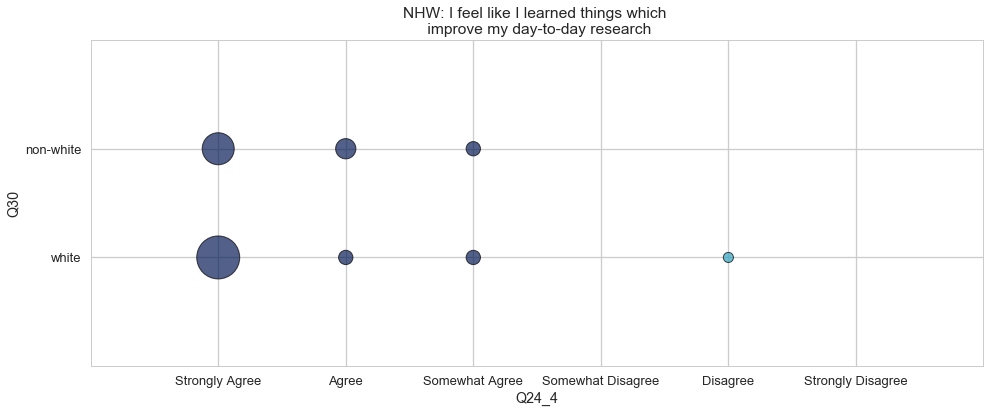

In [166]:
# question label
q1 = "Q24_4"

# demographic category
q2 = "Q30"

# title for the plot
title = 'I feel like I learned things which \n improve my day-to-day research'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

Meh. Looks pretty uniform.

What about forming connections?

Correlation for AHW: 5.595906048906048 for 8 degrees of freedom.
p-value for the correlation for AHW: 0.6923928179714607
The expected frequencies in each bin are: [[ 8.19672131 15.16393443  1.63934426]
 [ 6.8852459  12.73770492  1.37704918]
 [ 3.27868852  6.06557377  0.6557377 ]
 [ 0.6557377   1.21311475  0.13114754]
 [ 0.98360656  1.81967213  0.19672131]]
Effect size for AHW: 0.0 for 1.9333333333333331 degrees of freedom. 

Correlation for GHW: 7.98 for 6 degrees of freedom.
p-value for the correlation for GHW: 0.23957222283736523
The expected frequencies in each bin are: [[3.33333333 4.44444444 0.22222222]
 [5.         6.66666667 0.33333333]
 [6.25       8.33333333 0.41666667]
 [0.41666667 0.55555556 0.02777778]]
Effect size for GHW: 0.1632219781200257 for 1.8857142857142857 degrees of freedom. 

Correlation for NHW: 4.415557074504442 for 3 degrees of freedom.
p-value for the correlation for NHW: 0.21994721305407872
The expected frequencies in each bin are: [[11.58536585 13.41463415]

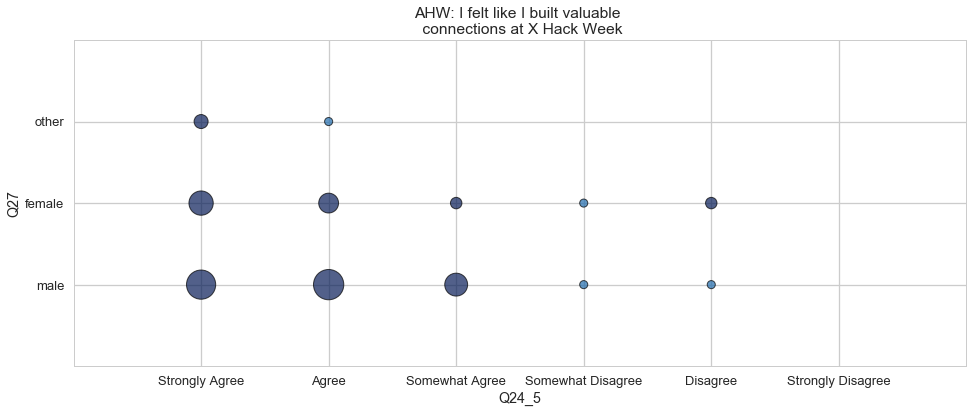

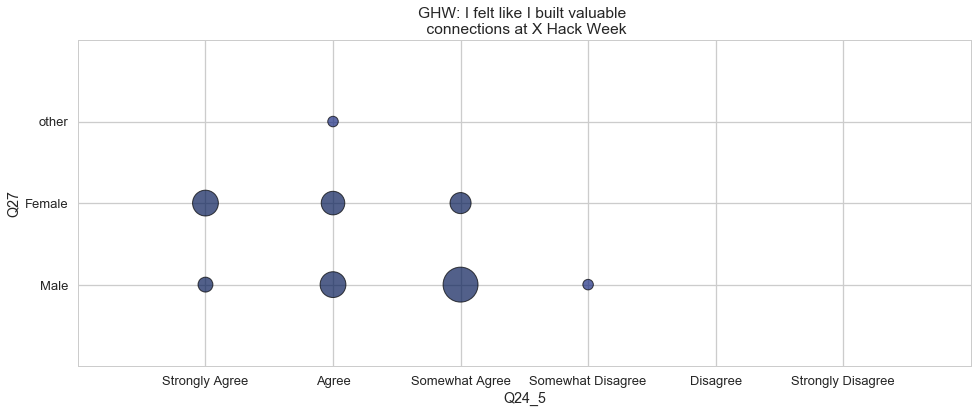

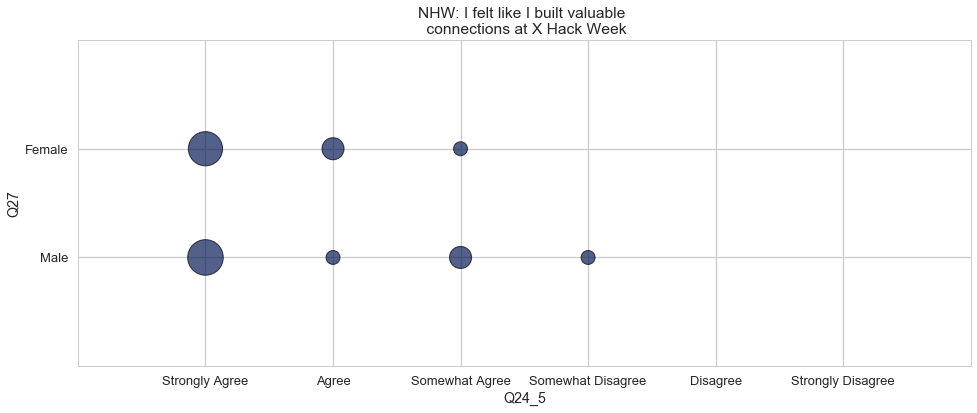

In [168]:
# question label
q1 = "Q24_5"

# demographic category
q2 = "Q27"

# title for the plot
title = 'I felt like I built valuable \n connections at X Hack Week'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

also test for race/ethnicity:

Correlation for AHW: 1.6428304538598657 for 4 degrees of freedom.
p-value for the correlation for AHW: 0.8010744172495593
The expected frequencies in each bin are: [[ 7.24590164 18.75409836]
 [ 5.57377049 14.42622951]
 [ 2.78688525  7.21311475]
 [ 0.55737705  1.44262295]
 [ 0.83606557  2.16393443]]
Effect size for AHW: 0.0 for 0.9833333333333334 degrees of freedom. 

Correlation for GHW: 8.421984265734267 for 3 degrees of freedom.
p-value for the correlation for GHW: 0.03804998330851719
The expected frequencies in each bin are: [[ 1.88235294  6.11764706]
 [ 2.58823529  8.41176471]
 [ 3.29411765 10.70588235]
 [ 0.23529412  0.76470588]]
Effect size for GHW: 0.4021146776011884 for 0.9696969696969697 degrees of freedom. 

Correlation for NHW: 3.4920634920634916 for 3 degrees of freedom.
p-value for the correlation for NHW: 0.3217929190144346
The expected frequencies in each bin are: [[ 9.6 14.4]
 [ 2.8  4.2]
 [ 2.8  4.2]
 [ 0.8  1.2]]
Effect size for NHW: 0.10320672978387453 for 0.97435897

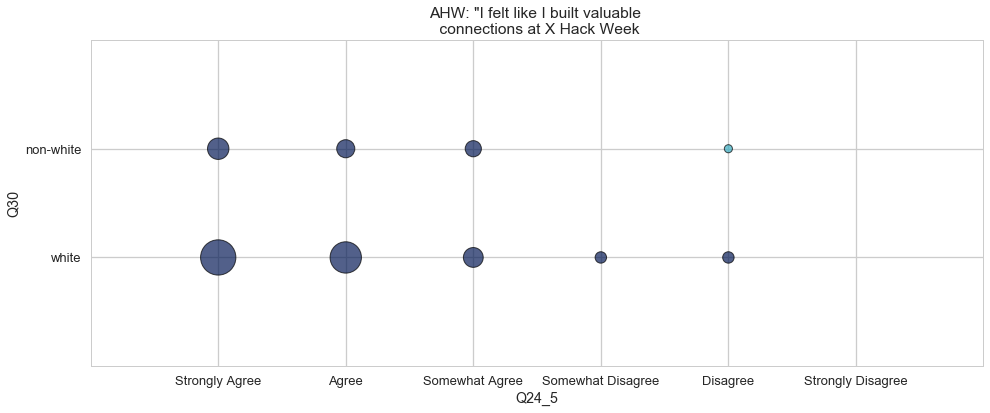

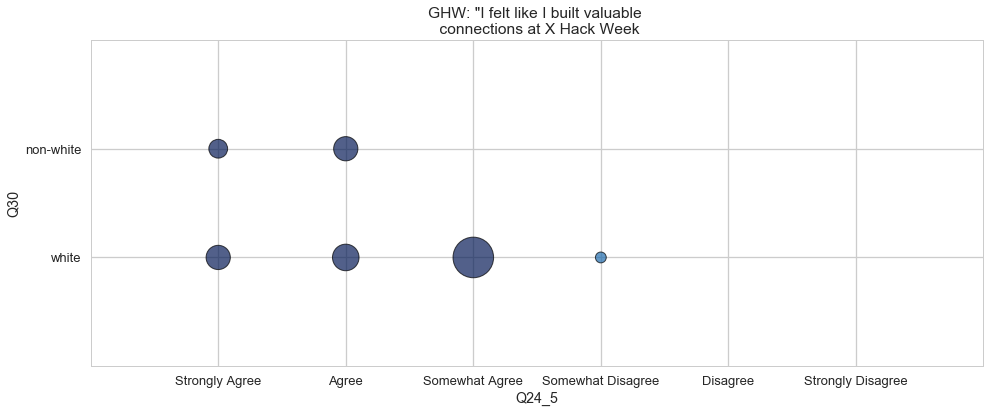

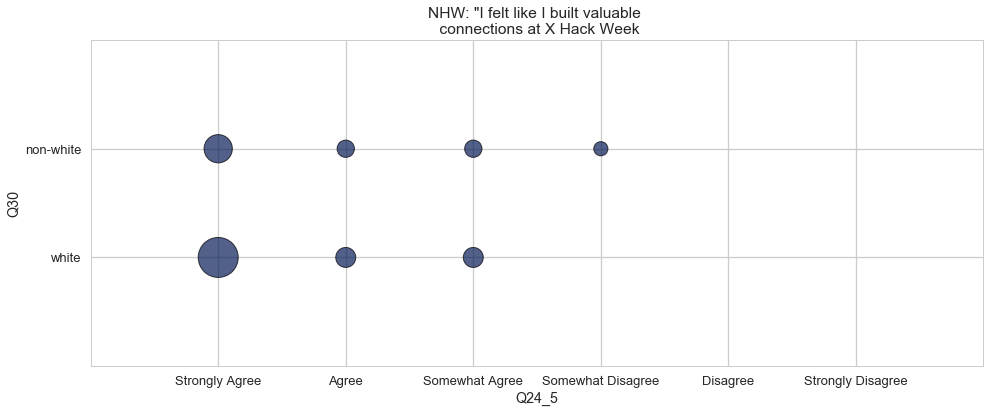

In [169]:
# question label
q1 = "Q24_5"

# demographic category
q2 = "Q30"

# title for the plot
title = '"I felt like I built valuable \n connections at X Hack Week'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

What about general collaboration?

Correlation for AHW: 8.128839869281046 for 8 degrees of freedom.
p-value for the correlation for AHW: 0.4209870053659946
The expected frequencies in each bin are: [[ 5.          8.94736842  1.05263158]
 [ 9.         16.10526316  1.89473684]
 [ 4.          7.15789474  0.84210526]
 [ 0.66666667  1.19298246  0.14035088]
 [ 0.33333333  0.59649123  0.07017544]]
Effect size for AHW: 0.0 for 1.9285714285714284 degrees of freedom. 

Correlation for GHW: 24.26654135338346 for 10 degrees of freedom.
p-value for the correlation for GHW: 0.006923482500372147
The expected frequencies in each bin are: [[ 0.82352941  1.11764706  0.05882353]
 [ 8.23529412 11.17647059  0.58823529]
 [ 3.29411765  4.47058824  0.23529412]
 [ 0.41176471  0.55882353  0.02941176]
 [ 0.41176471  0.55882353  0.02941176]
 [ 0.82352941  1.11764706  0.05882353]]
Effect size for GHW: 0.46754022681635293 for 1.878787878787879 degrees of freedom. 

Correlation for NHW: 6.751515151515152 for 5 degrees of freedom.
p-value for the corr

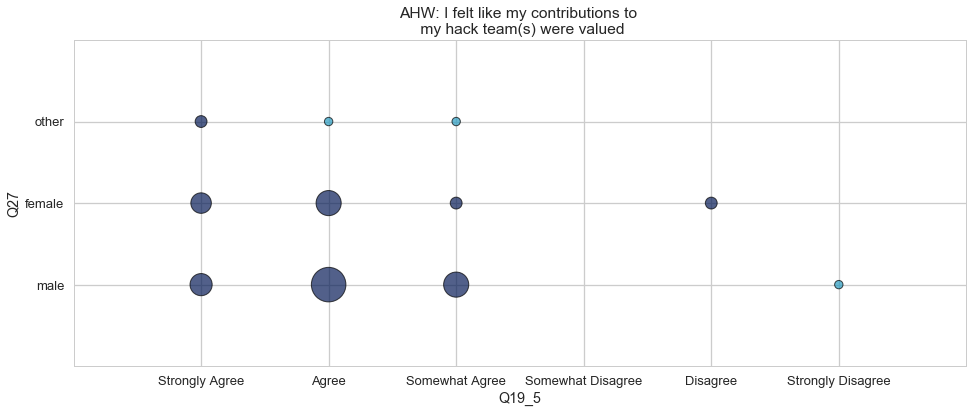

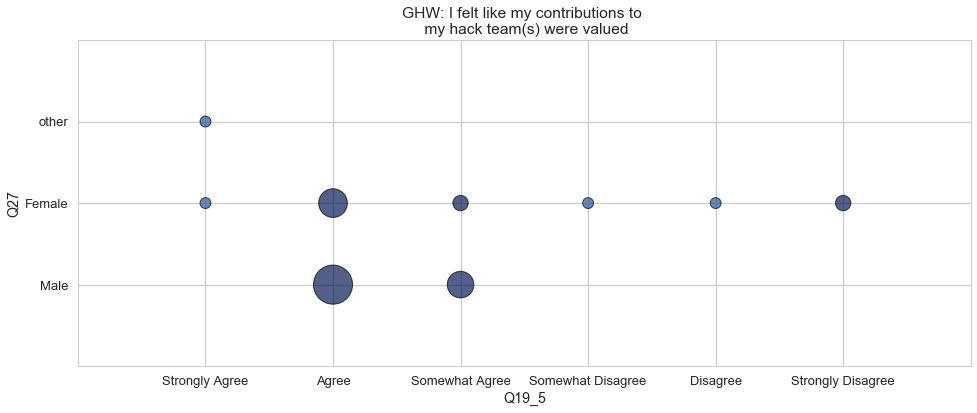

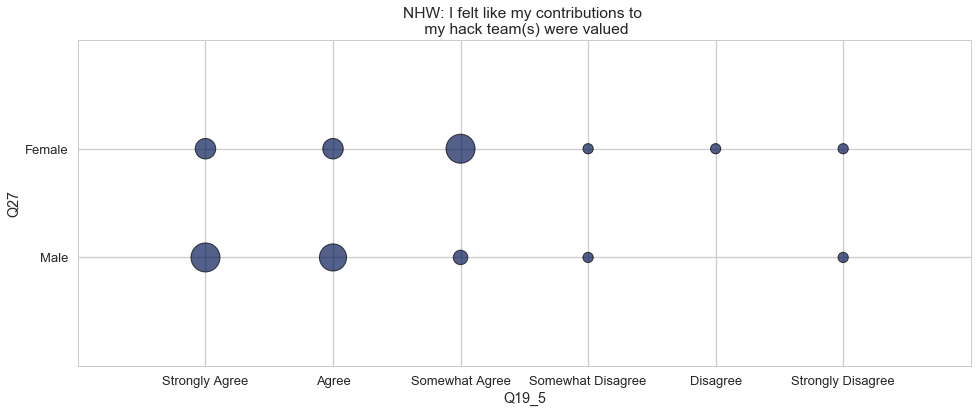

In [170]:
# question label
q1 = "Q19_5"

# demographic category
q2 = "Q27"

# title for the plot
title = 'I felt like my contributions to \n my hack team(s) were valued'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

Correlation for AHW: 13.13700832615561 for 4 degrees of freedom.
p-value for the correlation for AHW: 0.010625391521117078
The expected frequencies in each bin are: [[ 4.13793103 11.86206897]
 [ 6.98275862 20.01724138]
 [ 3.10344828  8.89655172]
 [ 0.51724138  1.48275862]
 [ 0.25862069  0.74137931]]
Effect size for AHW: 0.39889374217509366 for 0.9824561403508771 degrees of freedom. 

Correlation for GHW: 2.486215538847117 for 5 degrees of freedom.
p-value for the correlation for GHW: 0.7785695925048174
The expected frequencies in each bin are: [[ 0.5   1.5 ]
 [ 4.75 14.25]
 [ 1.75  5.25]
 [ 0.25  0.75]
 [ 0.25  0.75]
 [ 0.5   1.5 ]]
Effect size for GHW: 0.0 for 0.967741935483871 degrees of freedom. 

Correlation for NHW: 4.050465838509317 for 5 degrees of freedom.
p-value for the correlation for NHW: 0.5421732415142249
The expected frequencies in each bin are: [[4.54054054 7.45945946]
 [3.78378378 6.21621622]
 [3.78378378 6.21621622]
 [0.75675676 1.24324324]
 [0.37837838 0.62162162]
 [

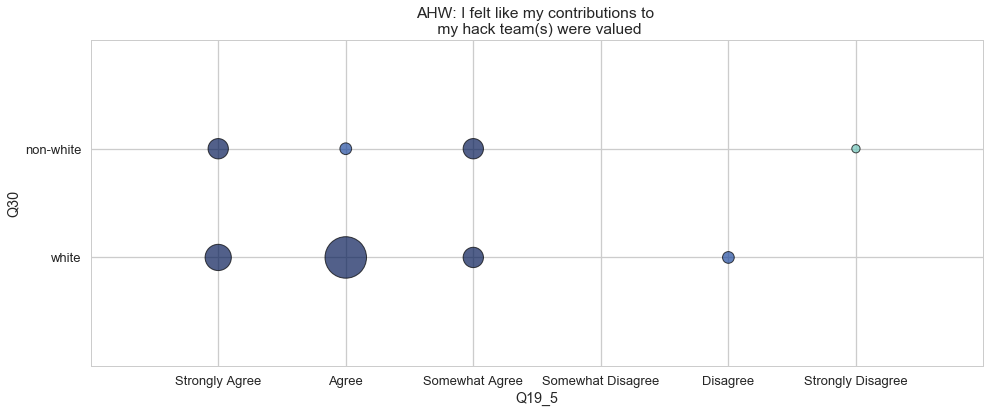

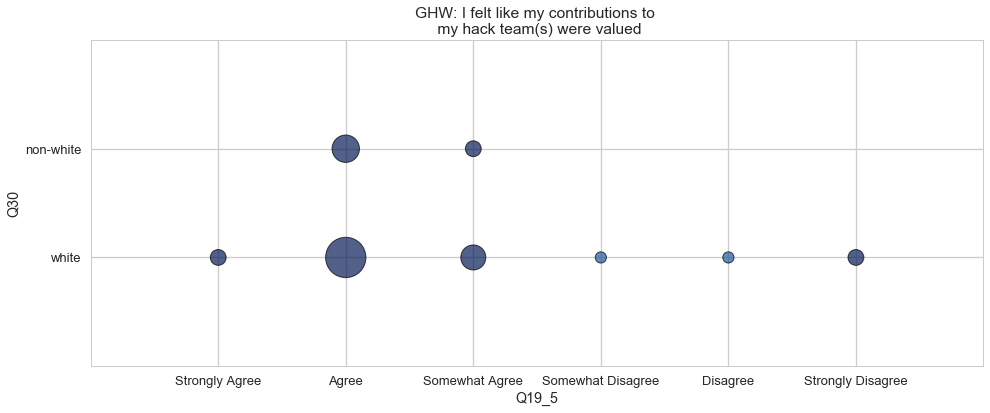

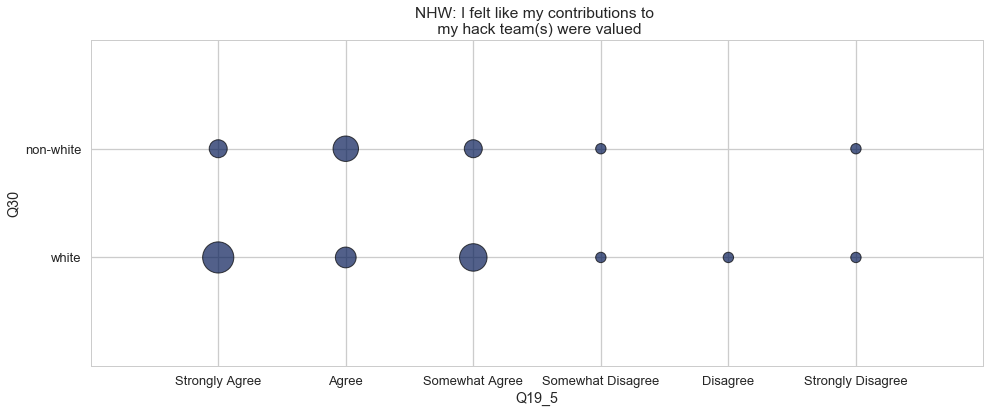

In [172]:
# question label
q1 = "Q19_5"

# demographic category
q2 = "Q30"

# title for the plot
title = 'I felt like my contributions to \n my hack team(s) were valued'

# ordered labels for the question
k = ["Strongly Agree", "Agree", "Somewhat Agree", 
     "Somewhat Disagree", "Disagree", "Strongly Disagree"]

test_association(AHWdata, GHWdata, NHWdata, q1, q2, title, k=k)

In [180]:
0.05/48

0.0010416666666666667

### Reproducibility + Open Science

* "I put code and/or data I created on GH or another public repo"
* "Before GHW, most of my code and data was already on GH or another public repo"
* "I feel scientists have an obligation to make their code and data public
* "I am embarrassed to put my code and data online"
* "I am afraid that if I put my code and data public, I will be scooped"
* "I feel like GHW has made me more comfortable with doing open science"

This is a bit more complicated, because some of these depend on each other.

Let's start with plotting the first three questions:

In [146]:
q_ind1 = ["Q38_1", "Q38_1", "Q38_1"]
title1 = "I put code and/or data I created at X Hack \n Week up on GitHub or another public repository"
q_ind2 = ["Q38_2", "Q38_2", "Q38_2"]
title2 = "Before X Hack Week, most of my code & data was\n already on GitHub or another public repository"
q_ind3 = ["Q38_6", "Q38_6", "Q38_6"]
title3 = "I feel like X Hack Week has made me \n more comfortable with doing open science"

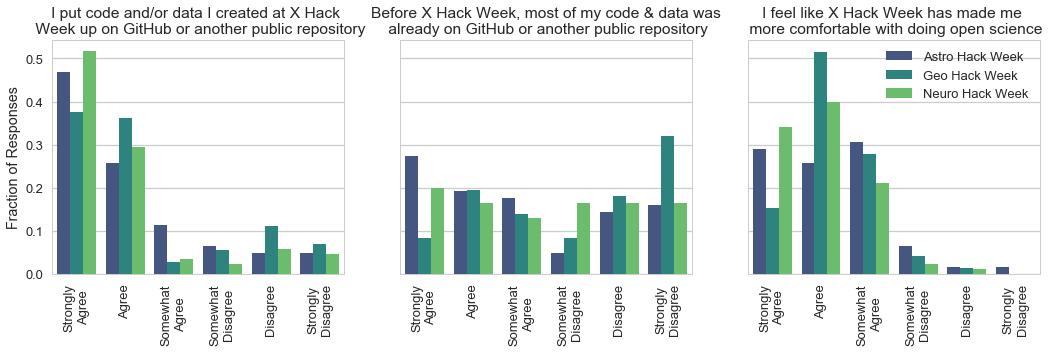

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=-4)
plt.savefig("../fig/eval_openscience.eps", format='eps', dpi=1000)

#### "I put code and/or data I created at X Hack \n Week up on GitHub or another public repository"

In [148]:
ahw_small = AHWdata[(AHWdata["Q38_1"] == "Agree") | 
        (AHWdata["Q38_1"] == "Strongly Agree") | 
        (AHWdata["Q38_1"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q38_1"] == "Agree") | 
        (GHWdata["Q38_1"] == "Strongly Agree") | 
        (GHWdata["Q38_1"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q38_1"] == "Agree") | 
        (NHWdata["Q38_1"] == "Strongly Agree") | 
        (NHWdata["Q38_1"] == "Somewhat Agree")]

print(len(ahw_small)/len(AHWdata["Q38_1"].dropna()))
print(len(ghw_small)/len(GHWdata["Q38_1"].dropna()))
print(len(nhw_small)/len(NHWdata["Q38_1"].dropna()))

0.8387096774193549
0.7638888888888888
0.8470588235294118


#### "Before X Hack Week, most of my code & data was\n already on GitHub or another public repository"

In [149]:
ahw_small = AHWdata[(AHWdata["Q38_2"] == "Agree") | 
        (AHWdata["Q38_2"] == "Strongly Agree") | 
        (AHWdata["Q38_2"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q38_2"] == "Agree") | 
        (GHWdata["Q38_2"] == "Strongly Agree") | 
        (GHWdata["Q38_2"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q38_2"] == "Agree") | 
        (NHWdata["Q38_2"] == "Strongly Agree") | 
        (NHWdata["Q38_2"] == "Somewhat Agree")]

print(len(ahw_small)/len(AHWdata["Q38_2"].dropna()))
print(len(ghw_small)/len(GHWdata["Q38_2"].dropna()))
print(len(nhw_small)/len(NHWdata["Q38_2"].dropna()))

0.6451612903225806
0.4166666666666667
0.49411764705882355


#### "I feel like X Hack Week has made me \n more comfortable with doing open science"

In [150]:
ahw_small = AHWdata[(AHWdata["Q38_6"] == "Agree") | 
        (AHWdata["Q38_6"] == "Strongly Agree") | 
        (AHWdata["Q38_6"] == "Somewhat Agree")]

ghw_small = GHWdata[(GHWdata["Q38_6"] == "Agree") | 
        (GHWdata["Q38_6"] == "Strongly Agree") | 
        (GHWdata["Q38_6"] == "Somewhat Agree")]

nhw_small = NHWdata[(NHWdata["Q38_6"] == "Agree") | 
        (NHWdata["Q38_6"] == "Strongly Agree") | 
        (NHWdata["Q38_6"] == "Somewhat Agree")]

print(len(ahw_small)/len(AHWdata["Q38_6"].dropna()))
print(len(ghw_small)/len(GHWdata["Q38_6"].dropna()))
print(len(nhw_small)/len(NHWdata["Q38_6"].dropna()))

0.8548387096774194
0.9444444444444444
0.9529411764705882


In [151]:
GHWdata["Q38_2"].value_counts()

Strongly Disagree    23
Agree                14
Disagree             13
Somewhat Agree       10
Somewhat Disagree     6
Strongly Agree        6
Name: Q38_2, dtype: int64

In [152]:
GHWdata2016["Q38_2"].value_counts()

Strongly Disagree    12
Disagree             10
Agree                 8
Somewhat Agree        4
Somewhat Disagree     2
Name: Q38_2, dtype: int64

In [153]:
GHWdata2016["Q38_2"].value_counts()

Strongly Disagree    12
Disagree             10
Agree                 8
Somewhat Agree        4
Somewhat Disagree     2
Name: Q38_2, dtype: int64

### How many of those who did not put most of their code online before the hack week put code and/or data online at the hack week?

* "I am embarrassed to put my code and data online"
* "I am afraid that if I put my code and data public, I will be scooped"
* "I feel like GHW has made me more comfortable with doing open science"

In [154]:
q_ind1 = ["Q38_4", "Q38_4", "Q38_4"]
title1 = "I am embarrassed to put my code & data online"
q_ind2 = ["Q38_5", "Q38_5", "Q38_5"]
title2 = "I am afraid that if I put my \n code & data public, I will be scooped"
q_ind3 = ["Q38_3", "Q38_3", "Q38_3"]
title3 = "I feel scientists have an \n obligation to make their code & data public"

In [155]:
ahw_small = AHWdata[(AHWdata["Q38_2"] == "Disagree") | 
        (AHWdata["Q38_2"] == "Strongly Disagree") | 
        (AHWdata["Q38_2"] == "Somewhat Disgree")]

ghw_small = GHWdata[(GHWdata["Q38_2"] == "Disagree") | 
        (GHWdata["Q38_2"] == "Strongly Disagree") | 
        (GHWdata["Q38_2"] == "Somewhat Disgree")]

nhw_small = NHWdata[(NHWdata["Q38_2"] == "Disagree") | 
        (NHWdata["Q38_2"] == "Strongly Disagree") | 
        (NHWdata["Q38_2"] == "Somewhat Disgree")]

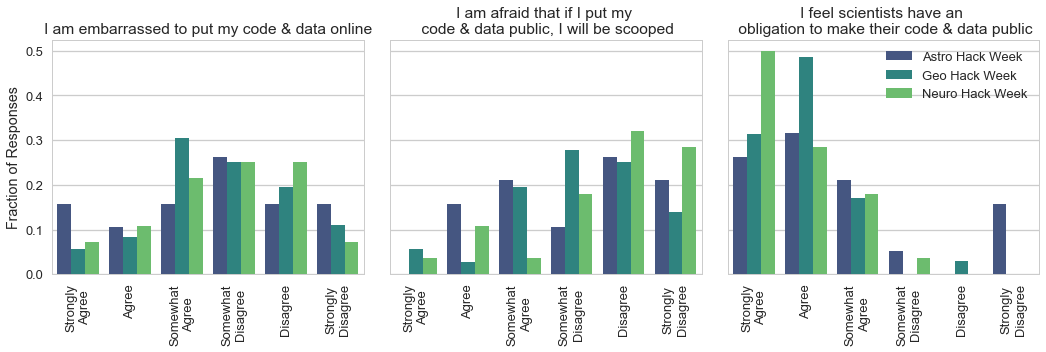

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx[:-1], ahw_small, ghw_small, nhw_small, ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx[:-1], ahw_small, ghw_small, nhw_small, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx[:-1], ahw_small, ghw_small, nhw_small, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=-2)
plt.savefig("../fig/eval_new_open_science.eps",  format='eps', dpi=1000)

Let's compare this to all participants:

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

ax1 = question_barplot(q_ind1, title1, 
                       idx[:-1], AHWdata, GHWdata, NHWdata,  ax=ax1, palette="viridis")
ax1.legend_.remove()

ax2 = question_barplot(q_ind2, title2,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax2, palette="viridis")
ax2.legend_.remove()
ax2.set_ylabel("")

ax3 = question_barplot(q_ind3, title3,
                       idx[:-1], AHWdata, GHWdata, NHWdata, ax=ax3, palette="viridis")

ax3.legend(loc=1)
ax3.set_ylabel("")


plt.tight_layout(w_pad=-2)
plt.savefig("../fig/eval_new_open_science_all.eps",  format='eps', dpi=1000)

The Astro Hack Week surveys are not 100% filled out. So let's check how they compare to the set of participants to look for any systematics:

In [ ]:
AHWdata2016["Q3"].value_counts()/AHWdata2016["Q3"].count()

In [ ]:
AHWquestions2017

In [ ]:
AHWdata2017["Q3"].value_counts()/AHWdata2017["Q3"].count()

In [ ]:
AHWdata2017["Q3"].count()

### Questions Probing Before/After Knowledge

In [ ]:
ahw_q = ["Q22_3"]
title= "Rate how much you think you learned about the following topics at AstroHackWeek: - Machine learning"

ghw_q2016 = ["Q22_3"]
ghw_q2017 = ["Q47_16"]
title2 = 'Rate how much you think you learned about the following topics at Geohackweek - Python'

nhw_q = ["22_3"]
title3 = "Rate how much you think you learned about the following topics at Neurohackweek - Machine learning"


In [ ]:
GHWdata2017["Q22_3"] = GHWdata2017["Q47_16"]

In [ ]:
GHWquestions2016

In [ ]:
GHWdata2017.Q47_16

In [ ]:
NHWquestions2017

### Participant demographics

Let's add some participant demographics!